## Credit Card Fraud Detection

In this project you will predict fraudulent credit card transactions with the help of Machine learning models. Please import the following libraries to get started.

In [1]:
import numpy as np
import pandas as pd
from sklearn.metrics import roc_auc_score,confusion_matrix,classification_report,roc_curve

import matplotlib.pyplot as plt
%matplotlib inline
import seaborn as sns

from sklearn import metrics
from sklearn import preprocessing
import numpy as np
import pandas as pd

import matplotlib.pyplot as plt
%matplotlib inline
import seaborn as sns

from sklearn import metrics
from sklearn import preprocessing


# import required libraries
from sklearn.model_selection import train_test_split
from sklearn.pipeline import Pipeline
from sklearn.pipeline import FeatureUnion
from sklearn.base import BaseEstimator, TransformerMixin
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import roc_auc_score,confusion_matrix,classification_report,roc_curve
from sklearn.preprocessing import StandardScaler,PowerTransformer
from imblearn.metrics import sensitivity_specificity_support
from sklearn.model_selection import StratifiedKFold,RandomizedSearchCV,GridSearchCV,StratifiedKFold
from sklearn.model_selection import cross_val_score
from sklearn.metrics import confusion_matrix
from sklearn.model_selection import GridSearchCV
from sklearn.ensemble import RandomForestClassifier
from sklearn.ensemble import GradientBoostingClassifier
from sklearn.tree import DecisionTreeClassifier
from sklearn.svm import SVC
from scipy.stats import skew

# Logistic Regression
from sklearn import linear_model #import the package
import statsmodels.api as sm

#Importing Miscellaneous Libraries
from collections import Counter
from numpy import argmax


#Importing Warning Libraries
import warnings
warnings.filterwarnings("ignore")

## Exploratory data analysis

Sanity check on the data:

In [2]:
df = pd.read_csv('creditcard.csv')
df.head()

,Time,V1,V2,V3,V4,V5,V6,V7,V8,V9,...,V21,V22,V23,V24,V25,V26,V27,V28,Amount,Class
0,0.0,-1.359807,-0.072781,2.536347,1.378155,-0.338321,0.462388,0.239599,0.098698,0.363787,...,-0.018307,0.277838,-0.110474,0.066928,0.128539,-0.189115,0.133558,-0.021053,149.62,0
1,0.0,1.191857,0.266151,0.166480,0.448154,0.060018,-0.082361,-0.078803,0.085102,-0.255425,...,-0.225775,-0.638672,0.101288,-0.339846,0.167170,0.125895,-0.008983,0.014724,2.69,0
2,1.0,-1.358354,-1.340163,1.773209,0.379780,-0.503198,1.800499,0.791461,0.247676,-1.514654,...,0.247998,0.771679,0.909412,-0.689281,-0.327642,-0.139097,-0.055353,-0.059752,378.66,0
3,1.0,-0.966272,-0.185226,1.792993,-0.863291,-0.010309,1.247203,0.237609,0.377436,-1.387024,...,-0.108300,0.005274,-0.190321,-1.175575,0.647376,-0.221929,0.062723,0.061458,123.50,0
4,2.0,-1.158233,0.877737,1.548718,0.403034,-0.407193,0.095921,0.592941,-0.270533,0.817739,...,-0.009431,0.798278,-0.137458,0.141267,-0.206010,0.502292,0.219422,0.215153,69.99,0


In [3]:
#observe the different feature type present in the data
df.shape

(284807, 31)

In [4]:
df.isnull().sum()

Time      0
V1        0
V2        0
V3        0
V4        0
V5        0
V6        0
V7        0
V8        0
V9        0
V10       0
V11       0
V12       0
V13       0
V14       0
V15       0
V16       0
V17       0
V18       0
V19       0
V20       0
V21       0
V22       0
V23       0
V24       0
V25       0
V26       0
V27       0
V28       0
Amount    0
Class     0
dtype: int64

In [5]:
df.describe()

,Time,V1,V2,V3,V4,V5,V6,V7,V8,V9,...,V21,V22,V23,V24,V25,V26,V27,V28,Amount,Class
count,284807.000000,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,...,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,284807.000000,284807.000000
mean,94813.859575,3.919560e-15,5.688174e-16,-8.769071e-15,2.782312e-15,-1.552563e-15,2.010663e-15,-1.694249e-15,-1.927028e-16,-3.137024e-15,...,1.537294e-16,7.959909e-16,5.367590e-16,4.458112e-15,1.453003e-15,1.699104e-15,-3.660161e-16,-1.206049e-16,88.349619,0.001727
std,47488.145955,1.958696e+00,1.651309e+00,1.516255e+00,1.415869e+00,1.380247e+00,1.332271e+00,1.237094e+00,1.194353e+00,1.098632e+00,...,7.345240e-01,7.257016e-01,6.244603e-01,6.056471e-01,5.212781e-01,4.822270e-01,4.036325e-01,3.300833e-01,250.120109,0.041527
min,0.000000,-5.640751e+01,-7.271573e+01,-4.832559e+01,-5.683171e+00,-1.137433e+02,-2.616051e+01,-4.355724e+01,-7.321672e+01,-1.343407e+01,...,-3.483038e+01,-1.093314e+01,-4.480774e+01,-2.836627e+00,-1.029540e+01,-2.604551e+00,-2.256568e+01,-1.543008e+01,0.000000,0.000000
25%,54201.500000,-9.203734e-01,-5.985499e-01,-8.903648e-01,-8.486401e-01,-6.915971e-01,-7.682956e-01,-5.540759e-01,-2.086297e-01,-6.430976e-01,...,-2.283949e-01,-5.423504e-01,-1.618463e-01,-3.545861e-01,-3.171451e-01,-3.269839e-01,-7.083953e-02,-5.295979e-02,5.600000,0.000000
50%,84692.000000,1.810880e-02,6.548556e-02,1.798463e-01,-1.984653e-02,-5.433583e-02,-2.741871e-01,4.010308e-02,2.235804e-02,-5.142873e-02,...,-2.945017e-02,6.781943e-03,-1.119293e-02,4.097606e-02,1.659350e-02,-5.213911e-02,1.342146e-03,1.124383e-02,22.000000,0.000000
75%,139320.500000,1.315642e+00,8.037239e-01,1.027196e+00,7.433413e-01,6.119264e-01,3.985649e-01,5.704361e-01,3.273459e-01,5.971390e-01,...,1.863772e-01,5.285536e-01,1.476421e-01,4.395266e-01,3.507156e-01,2.409522e-01,9.104512e-02,7.827995e-02,77.165000,0.000000
max,172792.000000,2.454930e+00,2.205773e+01,9.382558e+00,1.687534e+01,3.480167e+01,7.330163e+01,1.205895e+02,2.000721e+01,1.559499e+01,...,2.720284e+01,1.050309e+01,2.252841e+01,4.584549e+00,7.519589e+00,3.517346e+00,3.161220e+01,3.384781e+01,25691.160000,1.000000


For Features that are not converted using PCA, let's check the data:

In [6]:
df[['Time', 'Amount', 'Class']].describe()

,Time,Amount,Class
count,284807.000000,284807.000000,284807.000000
mean,94813.859575,88.349619,0.001727
std,47488.145955,250.120109,0.041527
min,0.000000,0.000000,0.000000
25%,54201.500000,5.600000,0.000000
50%,84692.000000,22.000000,0.000000
75%,139320.500000,77.165000,0.000000
max,172792.000000,25691.160000,1.000000


Time here is the Number of seconds elapsed between this transaction and the first transaction in the dataset

In [7]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 284807 entries, 0 to 284806
Data columns (total 31 columns):
 #   Column  Non-Null Count   Dtype  
---  ------  --------------   -----  
 0   Time    284807 non-null  float64
 1   V1      284807 non-null  float64
 2   V2      284807 non-null  float64
 3   V3      284807 non-null  float64
 4   V4      284807 non-null  float64
 5   V5      284807 non-null  float64
 6   V6      284807 non-null  float64
 7   V7      284807 non-null  float64
 8   V8      284807 non-null  float64
 9   V9      284807 non-null  float64
 10  V10     284807 non-null  float64
 11  V11     284807 non-null  float64
 12  V12     284807 non-null  float64
 13  V13     284807 non-null  float64
 14  V14     284807 non-null  float64
 15  V15     284807 non-null  float64
 16  V16     284807 non-null  float64
 17  V17     284807 non-null  float64
 18  V18     284807 non-null  float64
 19  V19     284807 non-null  float64
 20  V20     284807 non-null  float64
 21  V21     28

In [8]:
# Univariate analysis:

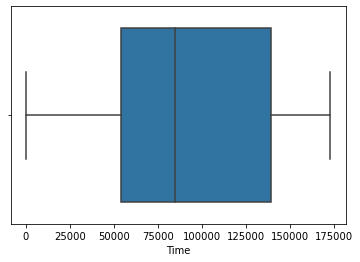

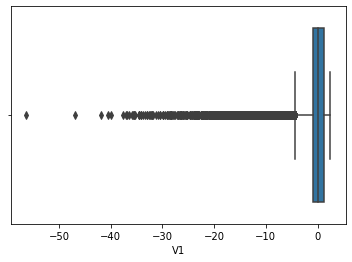

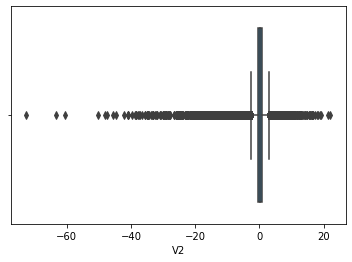

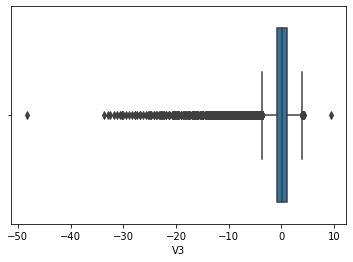

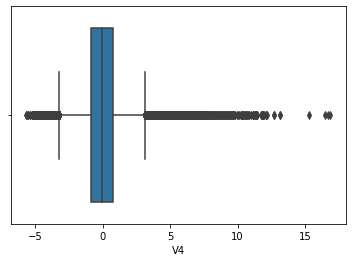

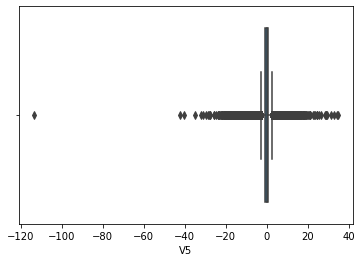

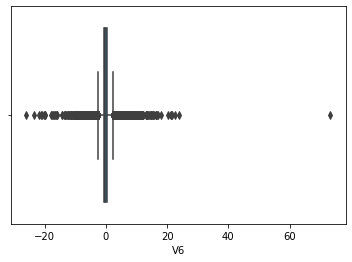

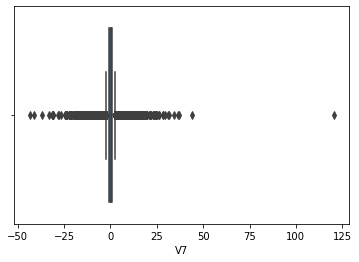

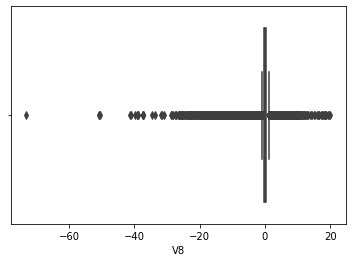

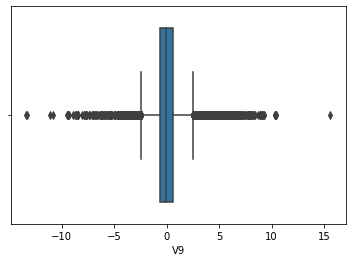

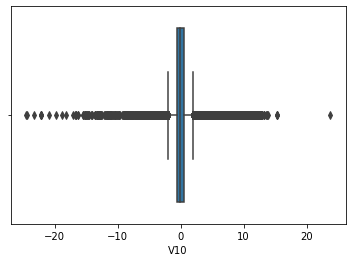

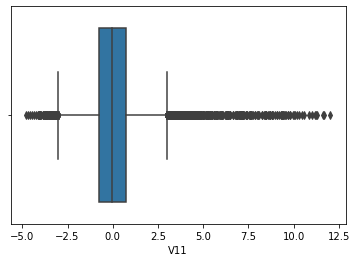

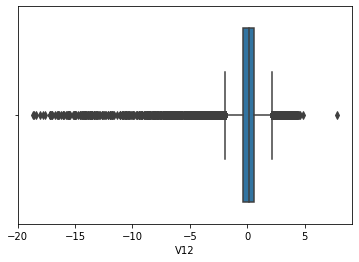

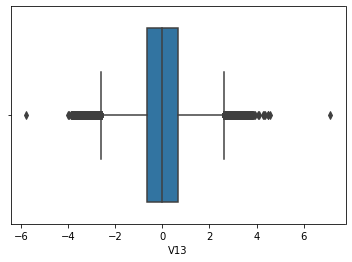

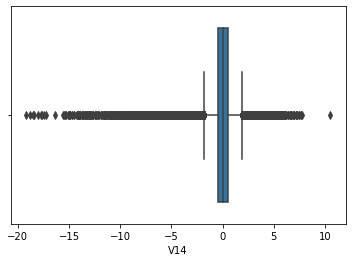

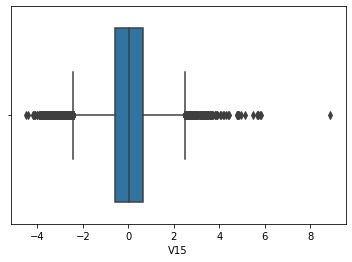

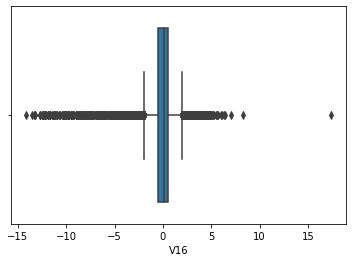

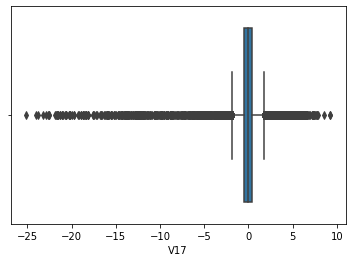

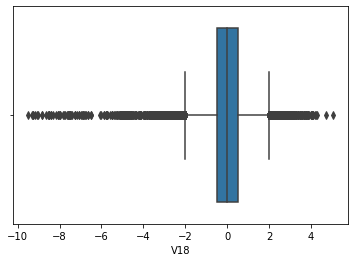

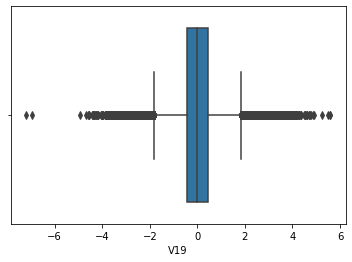

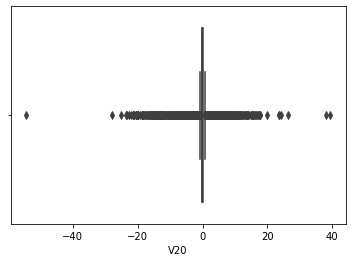

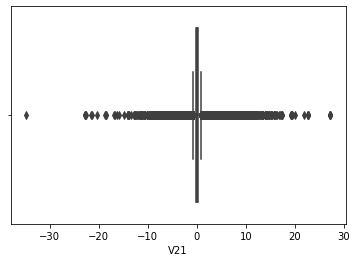

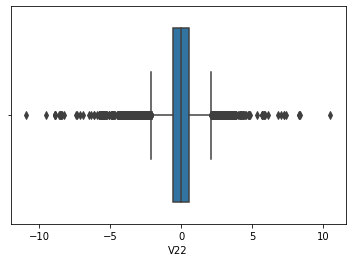

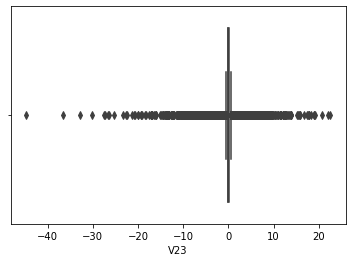

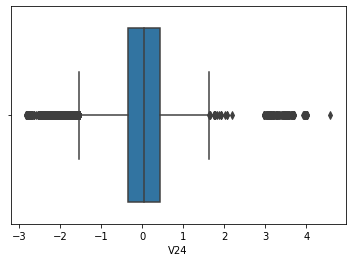

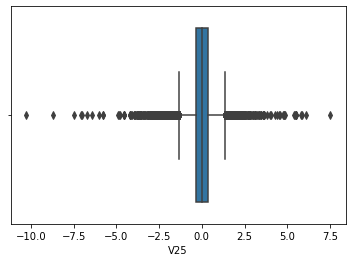

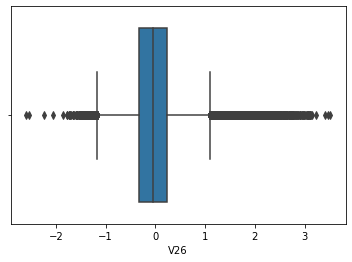

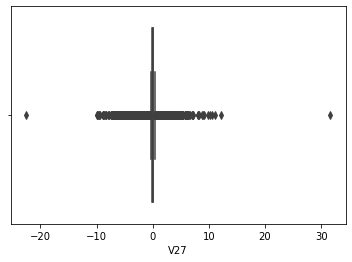

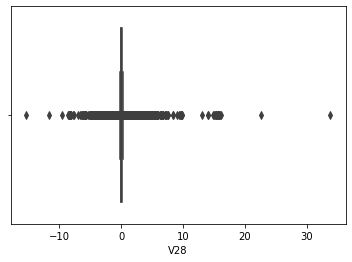

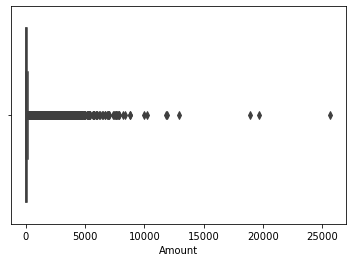

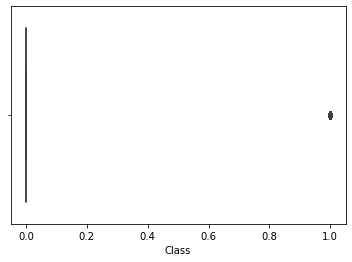

In [9]:
from pandas.api.types import is_numeric_dtype
for item in df.columns:
    if is_numeric_dtype(df[item]):
        sns.boxplot(df[item])
        plt.show()

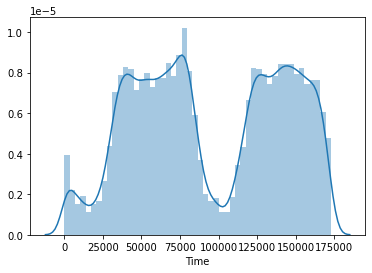

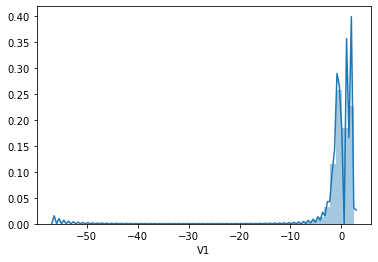

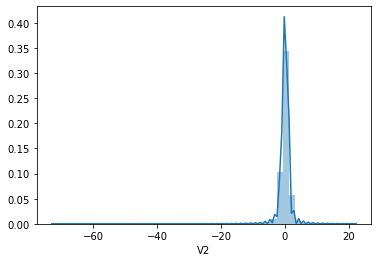

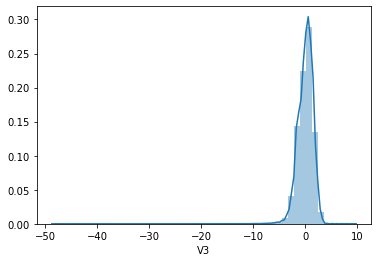

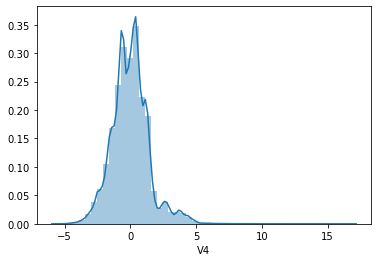

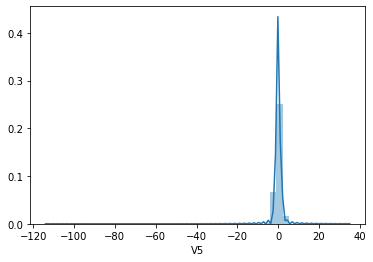

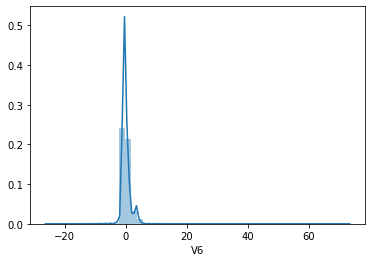

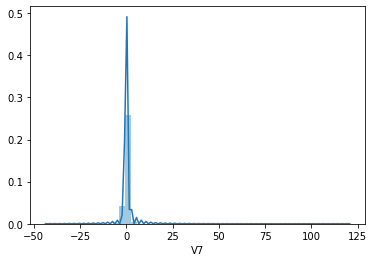

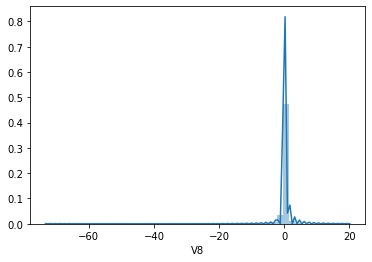

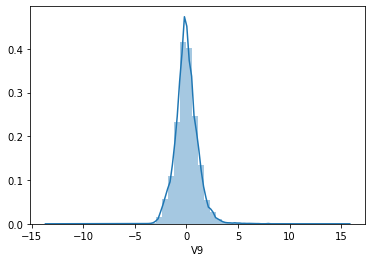

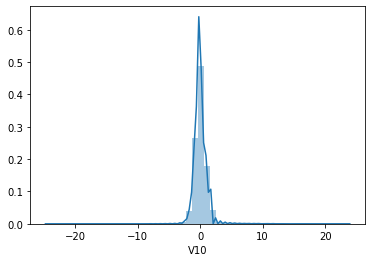

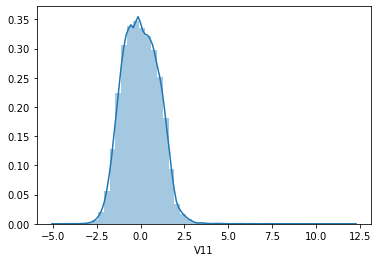

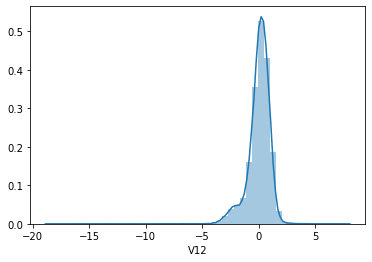

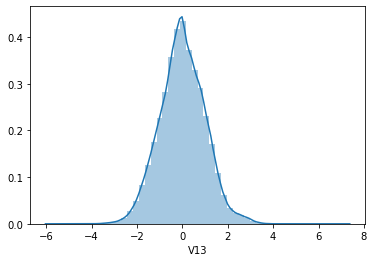

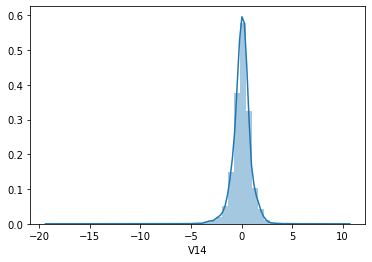

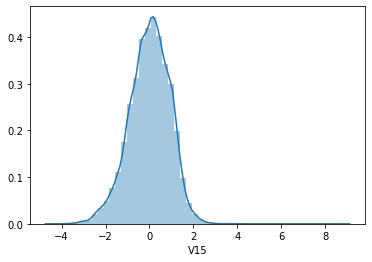

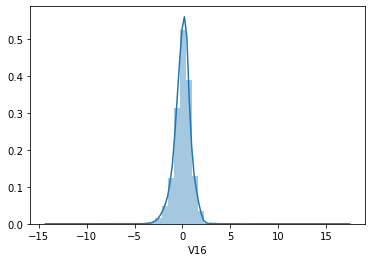

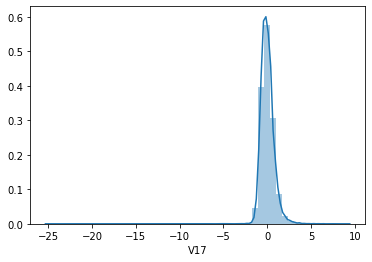

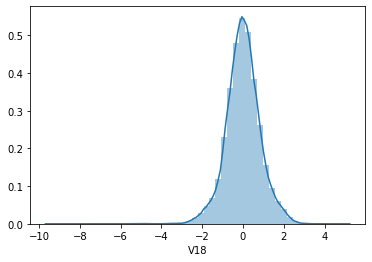

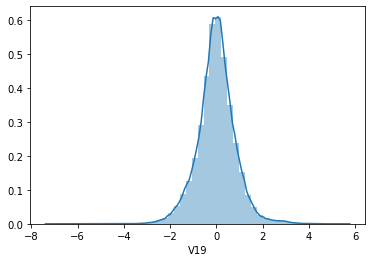

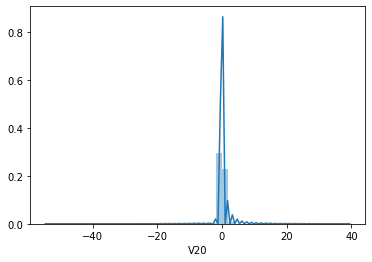

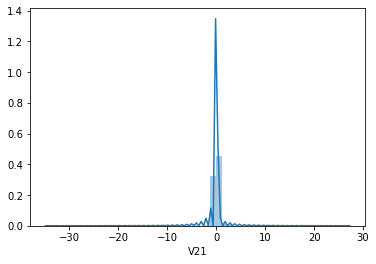

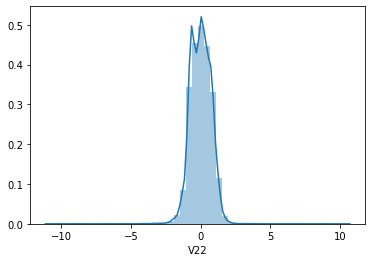

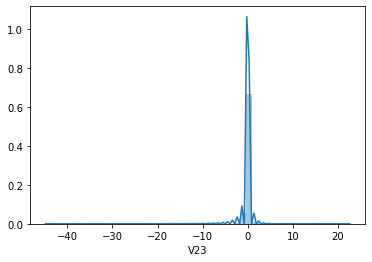

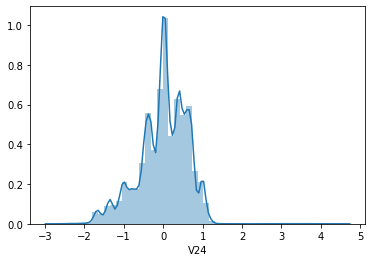

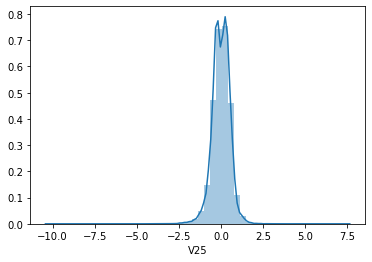

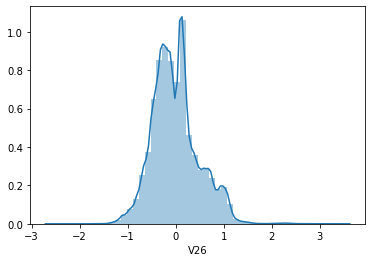

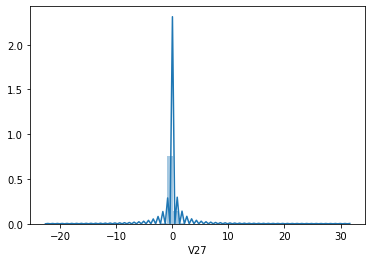

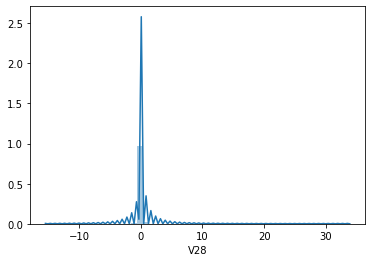

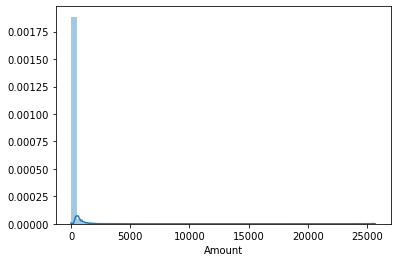

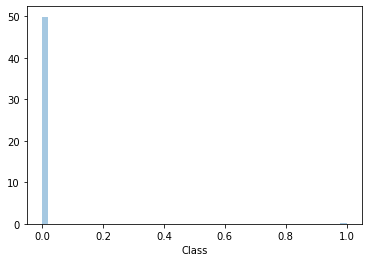

In [10]:
from pandas.api.types import is_numeric_dtype
for item in df.columns:
    if is_numeric_dtype(df[item]):
        sns.distplot(df[item])
        plt.show()

In [11]:
from scipy.stats import skew

In [12]:
col = list(df.columns)
for i in col:
    print(i, skew(df[i]))

Time -0.03556743068120296
V1 -3.2806500243599563
V2 -4.624841215356954
V3 -2.2401436419416556
V4 0.6762885361363855
V5 -2.4258887193785577
V6 1.8265710448869008
V7 2.5538939666831117
V8 -8.521899311980174
V9 0.5546768505565418
V10 1.1871343376109698
V11 0.3565039778679557
V12 -2.2783889356830715
V13 0.0652331143394307
V14 -1.9951653322115102
V15 -0.30842135775467616
V16 -1.1009604775565411
V17 -3.8448942237357953
V18 -0.25987889937453285
V19 0.10919118489771402
V20 -2.0371445699300104
V21 3.5929722697554753
V22 -0.21325649967250146
V23 -5.875109397316075
V24 -0.5524963913014509
V25 -0.4157904004474158
V26 0.5766895799228516
V27 -1.1702027792556084
V28 11.19203224646587
Amount 16.97763503663315
Class 23.99745292182408


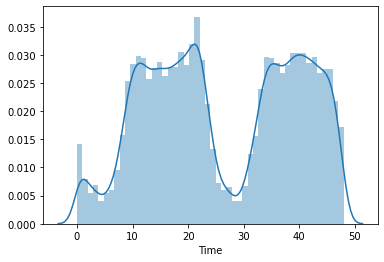

In [13]:
# Distribution of time in terms of hours would be:
sns.distplot(df['Time']/(3600))

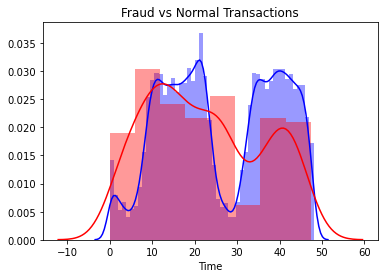

In [14]:
sns.distplot(df[df['Class'] == 0]["Time"]/3600, color='b')
sns.distplot(df[df['Class'] == 1]["Time"]/3600, color='r')
plt.title('Fraud vs Normal Transactions')
plt.show()

The red graph indicates normal transactions wrt time in hours and blue graph indicates distribution of fradulent transactions wrt time.

Here we will observe the distribution of our classes

In [15]:
classes=df['Class'].value_counts()
normal_share=classes[0]/df['Class'].count()*100
fraud_share=classes[1]/df['Class'].count()*100

In [16]:
print(normal_share)
print(fraud_share)

99.82725143693798
0.1727485630620034


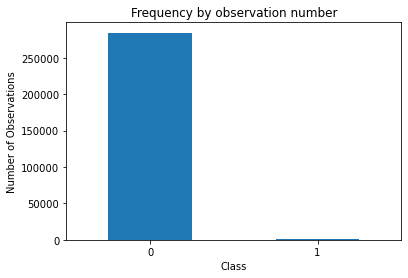

In [17]:
# Create a bar plot for the number and percentage of fraudulent vs non-fraudulent transcations
plt.xlabel("Class")
plt.ylabel("Number of Observations")
classes.plot(kind = 'bar',title = 'Frequency by observation number',rot=0)

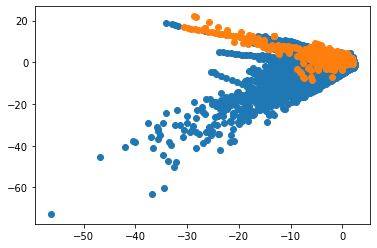

In [18]:
# Plot how fraud and non-fraud cases are scattered 
plt.scatter(df.loc[df['Class'] == 0]['V1'], df.loc[df['Class'] == 0]['V2'])
plt.scatter(df.loc[df['Class'] == 1]['V1'], df.loc[df['Class'] == 1]['V2'])
plt.show()

In [19]:
df1 = df.copy()
df1['Time_hrs'] = df1['Time']/3600

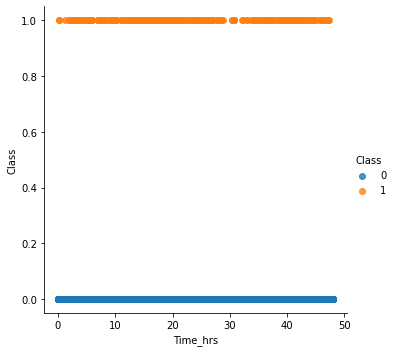

<Figure size 1080x1080 with 0 Axes>

In [20]:
# Create a scatter plot to observe the distribution of classes with time
import seaborn as sns
sns.lmplot('Time_hrs', 'Class', df1, hue= 'Class', fit_reg=False)
plt.figure(figsize=(15, 15))
fig = plt.gcf()
plt.show()

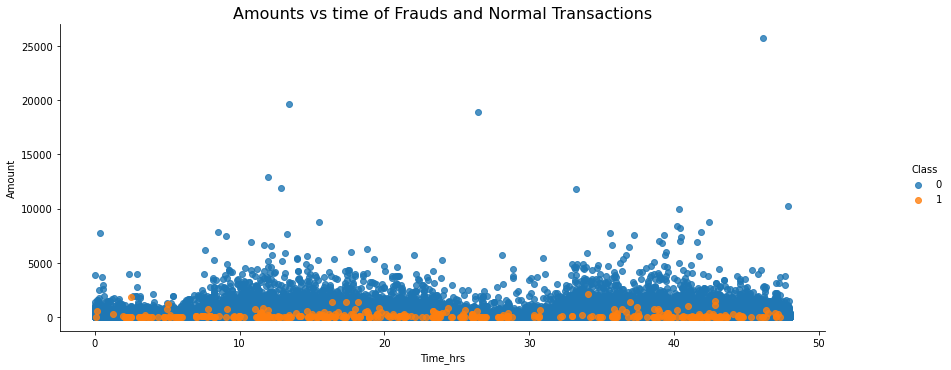

In [21]:
# Create a scatter plot to observe the distribution of classes with Amount
import seaborn as sns
sns.lmplot('Time_hrs', 'Amount', df1, hue='Class', fit_reg=False)
plt.title("Amounts vs time of Frauds and Normal Transactions",fontsize=16)
fig = plt.gcf()
fig.set_size_inches(15, 5)
plt.show()

In [22]:
# Also, let's see the distribution of amount over classes:
df_fraud = df[df['Class'] == 1]
df_normal = df[df['Class'] == 0]

In [23]:
df1 = df.copy()
df1['log_Amount'] = np.log(df1['Amount']+0.01)

In [24]:
df1['log_Amount'].describe()

count    284807.000000
mean          2.960364
std           1.950786
min          -4.605170
25%           1.724551
50%           3.091497
75%           4.346076
max          10.153903
Name: log_Amount, dtype: float64

Text(0, 0.5, 'log_Amount')

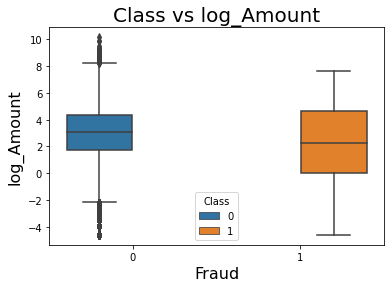

In [25]:
pl = sns.boxplot(x ="Class",y="log_Amount",hue="Class",data=df1)
pl.set_title("Class vs log_Amount", fontsize=20)
pl.set_xlabel("Fraud", fontsize=16)
pl.set_ylabel("log_Amount", fontsize = 16)

Text(0, 0.5, 'log_Amount')

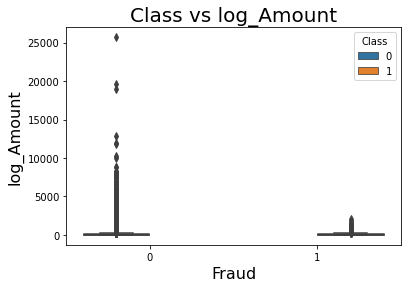

In [26]:
pl = sns.boxplot(x="Class",y="Amount",hue="Class",data=df)
pl.set_title("Class vs log_Amount", fontsize=20)
pl.set_xlabel("Fraud", fontsize=16)
pl.set_ylabel("log_Amount", fontsize = 16)

There is a small difference in the log amounts of fraudulent and non-fradulent Classes.
Though, the IQR of fraudulent transactions is higher than normal transactions, the normal transactions have highest values

In [27]:
fraud_case = df.Class == 1
normal_case = df.Class == 0

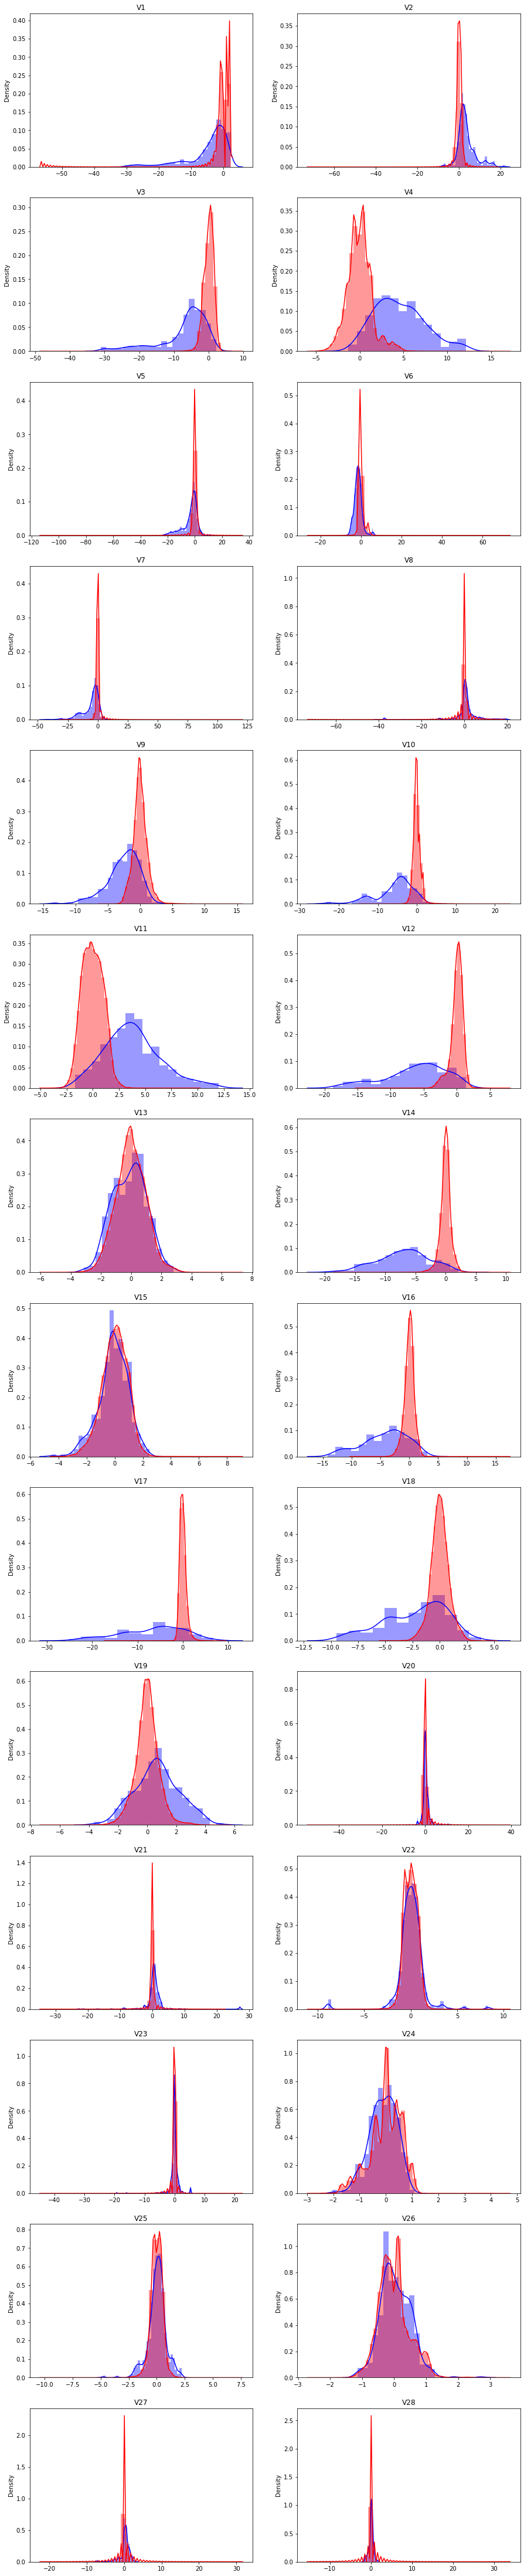

In [28]:
#Plotting for classes vs the V's
columns = df.iloc[:,1:29].columns
import matplotlib.gridspec as gridspec
# frauds = df.Class == 1
# normals = df.Class == 0

grid = gridspec.GridSpec(14, 2)
plt.figure(figsize=(15,20*4))

for n, col in enumerate(df[columns]):
    ax = plt.subplot(grid[n])
    sns.distplot(df[col][fraud_case], color='b')
    sns.distplot(df[col][normal_case], color='r')
    ax.set_ylabel('Density')
    ax.set_title(str(col))
    ax.set_xlabel('')
plt.show()

In [29]:
# plt.figure(figsize = (20,20)) 
# sns.pairplot(df)
# plt.savefig("pairplot1.png")

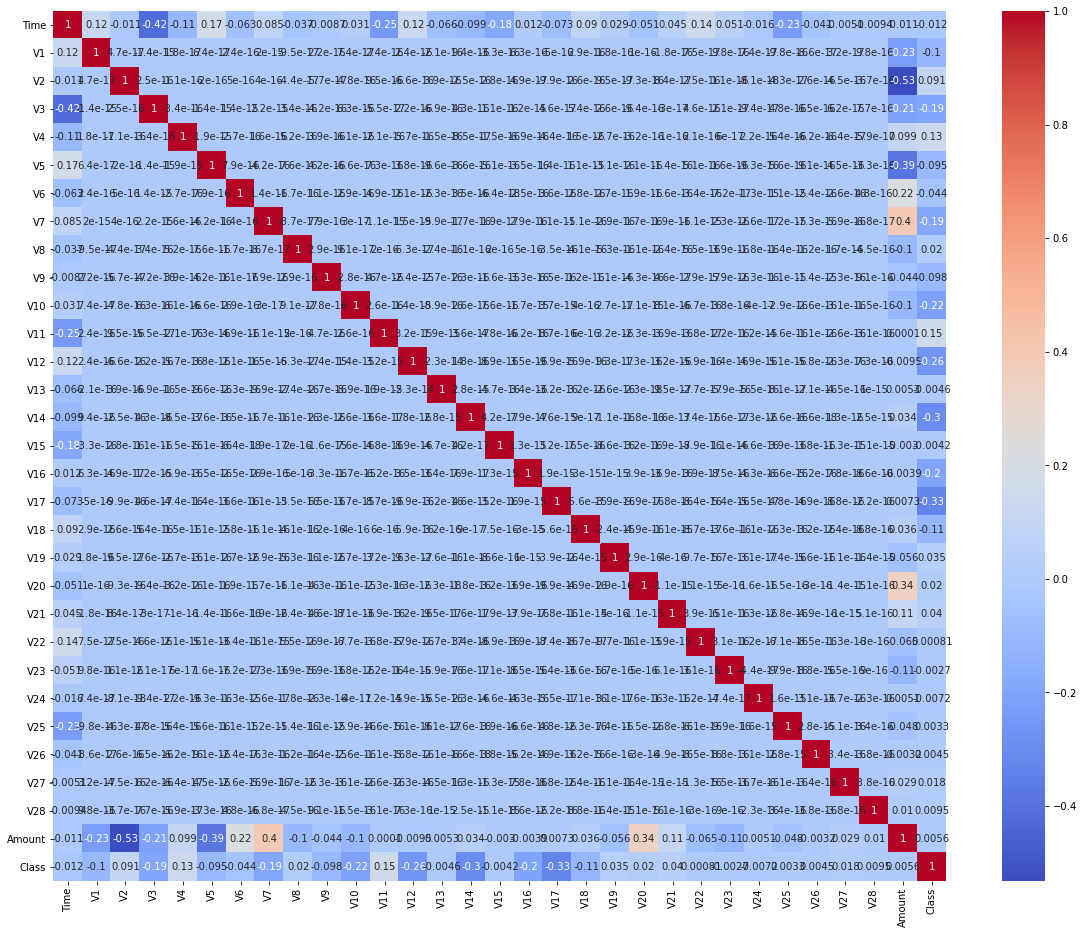

In [30]:
plt.figure(figsize=(20,16))
sns.heatmap(df.corr(), cmap = 'coolwarm', annot=True)
plt.show()

In [31]:
# Highly correlated values:

In [32]:
corr_matrix = df.corr().abs()
sol = (corr_matrix.where(np.triu(np.ones(corr_matrix.shape), k=1).astype(np.bool))
                  .stack()
                  .sort_values(ascending=False))

In [33]:
for index, value in sol.items():
    print(index, value)

('V2', 'Amount') 0.5314089393279761
('Time', 'V3') 0.4196181722115274
('V7', 'Amount') 0.3973112781816456
('V5', 'Amount') 0.3863562561629983
('V20', 'Amount') 0.3394034045461327
('V17', 'Class') 0.32648106724269765
('V14', 'Class') 0.30254369580346246
('V12', 'Class') 0.2605929248764044
('Time', 'V11') 0.247689437486676
('Time', 'V25') 0.23308279059831727
('V1', 'Amount') 0.2277086529223733
('V10', 'Class') 0.21688294364035493
('V6', 'Amount') 0.21598118022524546
('V3', 'Amount') 0.2108804752898809
('V16', 'Class') 0.1965389403034051
('V3', 'Class') 0.19296082706681578
('V7', 'Class') 0.1872565915137108
('Time', 'V15') 0.18345327348103926
('Time', 'V5') 0.17307212331039132
('V11', 'Class') 0.15487564474346413
('Time', 'V22') 0.14405905486146361
('V4', 'Class') 0.1334474862385853
('Time', 'V12') 0.12434806837193435
('Time', 'V1') 0.11739630597839038
('V23', 'Amount') 0.11263255363252014
('V18', 'Class') 0.11148525388869356
('V21', 'Amount') 0.10599892763770487
('Time', 'V4') 0.10526020

v1, v2, v3, v4, v5, v6, v7, v8, v10, v11, v12, v14, v15, v16, v17, v18, v20, v21, v22, v23, v25, time, amount, class

We can see a interesting different distribuition in some of our features like V4, V9, V16, V17 and a lot more.
Now let's take a look on time distribuition

In [34]:
# Drop unnecessary columns

### Splitting the data into train & test data

In [35]:
# Putting feature variables to X
X = df1.drop(['Class','log_Amount'], axis=1)
X.head()
y= df1['Class']#class variable

In [36]:
from sklearn import model_selection
from sklearn.model_selection import train_test_split

X_train, X_test, y_train, y_test = train_test_split(X, y, train_size=0.7, test_size=0.3, random_state=100)
X_train.columns

Index(['Time', 'V1', 'V2', 'V3', 'V4', 'V5', 'V6', 'V7', 'V8', 'V9', 'V10',
       'V11', 'V12', 'V13', 'V14', 'V15', 'V16', 'V17', 'V18', 'V19', 'V20',
       'V21', 'V22', 'V23', 'V24', 'V25', 'V26', 'V27', 'V28', 'Amount'],
      dtype='object')

##### Preserve X_test & y_test to evaluate on the test data once you build the model

In [37]:
print(np.sum(y))
print(np.sum(y_train))
print(np.sum(y_test))

492
350
142


### Plotting the distribution of a variable

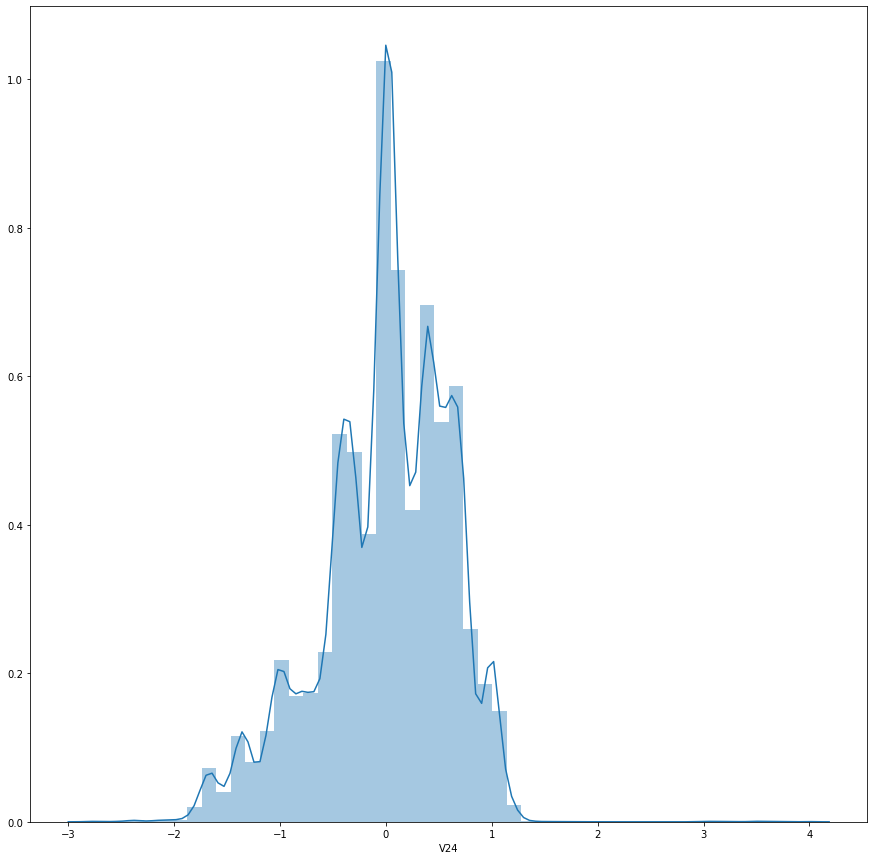

In [38]:
# plot the histogram of a variable from the dataset to see the skewness
# Distribution of time in terms of hours would be:
plt.figure(figsize=(15,15))
sns.distplot(X_train['V24'])

### If there is skewness present in the distribution use:
- <b>Power Transformer</b> package present in the <b>preprocessing library provided by sklearn</b> to make distribution more gaussian

In [39]:
# - Apply : preprocessing.PowerTransformer(copy=False) to fit & transform the train & test data
from sklearn.preprocessing import PowerTransformer
pt = PowerTransformer(method='yeo-johnson',standardize='True',copy='False')
to_scale_features = X_train.columns
X_train[to_scale_features]=pt.fit_transform(X_train[to_scale_features])
#X_test[['Amount','V24']]=pt.transform(X_test[['Amount','V24']])
X_train

,Time,V1,V2,V3,V4,V5,V6,V7,V8,V9,...,V20,V21,V22,V23,V24,V25,V26,V27,V28,Amount
7610,-1.977762,0.598470,-0.076635,0.414364,0.017924,-0.150960,0.345395,-0.423005,0.053042,1.152344,...,-0.142787,-0.217742,-0.215110,0.229615,-0.518220,-0.140181,1.711153,-0.180481,-0.027825,-1.853467
190214,0.730062,1.445565,-0.134373,-0.902690,0.208193,0.136115,-0.409005,0.073299,-0.252318,0.277355,...,-0.220963,-0.355324,-0.881595,0.418801,-0.841362,-0.510193,0.511993,-0.206056,-0.220886,-1.446662
130590,-0.254749,0.843049,-0.987411,-0.652970,-1.919788,0.423178,2.278265,-1.478071,0.853644,-1.629738,...,-0.090662,-0.009865,0.104342,-0.203779,1.917859,0.990486,0.014536,0.099397,0.107899,0.706491
247916,1.193842,-0.326321,0.805913,-0.366669,-0.296532,0.512231,-0.805682,0.794658,-0.185940,0.130993,...,0.173877,-0.457294,-1.012077,0.252022,1.861162,-0.857357,0.288656,0.854371,0.473371,-1.576187
55518,-0.980315,0.566536,-0.144094,0.637616,0.445581,-0.564414,0.053504,-0.482081,0.184401,0.269297,...,-0.222159,0.013937,-0.092414,0.225649,0.287704,-0.037162,0.529867,-0.020486,0.051746,-0.715547
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
212912,0.923455,-0.630632,0.215177,0.615233,-1.155230,-0.623146,0.727934,-1.910661,-3.101570,-1.147246,...,0.604843,0.740673,0.762147,-1.137961,-0.636970,3.129046,0.539941,0.325097,0.516592,0.497641
65615,-0.869612,-1.383668,-1.226642,0.267430,-0.867011,0.800285,-0.825537,-0.609117,0.635746,-1.648254,...,-0.691978,-0.712798,-2.042887,1.272350,-0.641860,-1.250209,1.004134,-0.467464,-0.073802,0.282765
253799,1.242676,-1.081839,-0.417713,-0.334442,0.434180,-0.317791,0.185454,3.256841,-0.474849,-1.527315,...,1.633313,0.818014,0.746896,1.292228,-0.070097,3.463178,-0.601425,-0.618671,0.234641,1.895448
210755,0.906129,-0.460376,0.582313,0.031611,0.346307,0.443842,-0.593838,0.777128,-0.347515,0.101595,...,-0.506405,0.397357,1.203771,-0.211212,-0.135570,-0.016326,-1.245155,-0.733139,0.064881,-1.268556


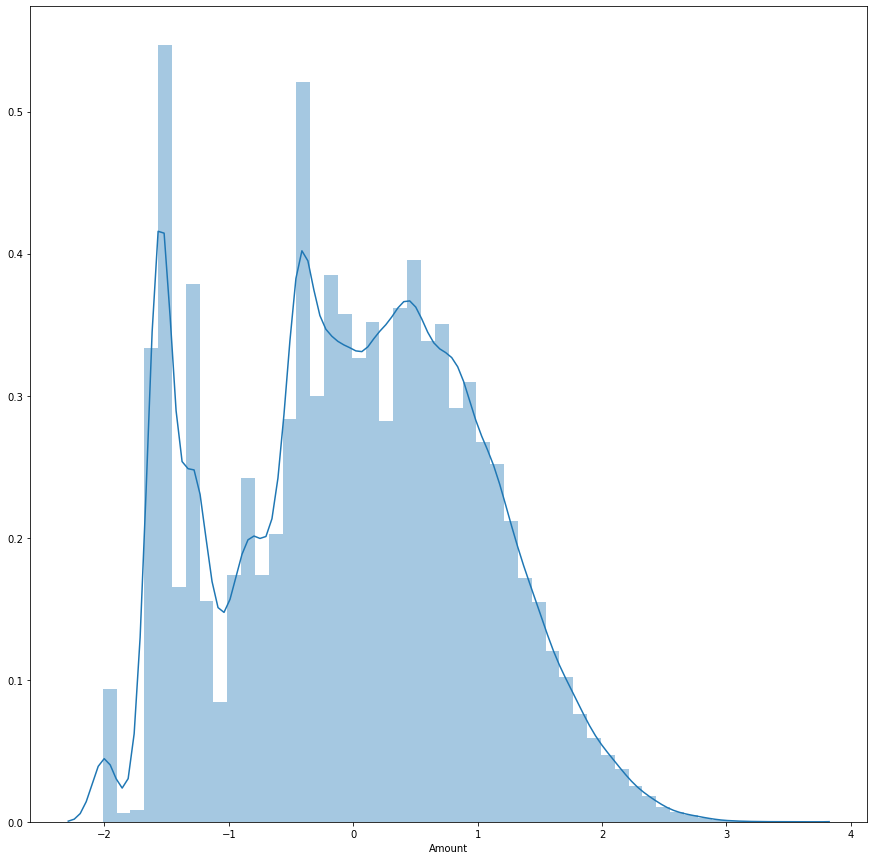

In [40]:
# plot the histogram of a variable from the dataset again to see the result 
plt.figure(figsize=(15,15))
sns.distplot(X_train['Amount'])

In [41]:
# Preserving the original datasets
X_train_rf=X_train
X_test_rf=X_test
y_train_rf=y_train
y_test_rf=y_test

In [42]:
break

SyntaxError: 'break' outside loop (<ipython-input-42-6aaf1f276005>, line 1)

## Model Building


### Logistic Regressionn

In [ ]:
# Logistic Regression
from sklearn import linear_model #import the package
import statsmodels.api as sm

In [ ]:
# Logistic regression model
# Adding constant to the training model
logm1 = sm.GLM(y_train,(sm.add_constant(X_train)), family = sm.families.Binomial())
logm1.fit().summary()

In [ ]:
from sklearn.linear_model import LogisticRegression
logreg = LogisticRegression()

In [ ]:
from sklearn.feature_selection import RFE
rfe = RFE(logreg, 10)             # running RFE with 15 variables as output
rfe = rfe.fit(X_train, y_train)

In [ ]:
rfe.support_

In [ ]:
list(zip(X_train.columns, rfe.support_, rfe.ranking_))

In [ ]:
col = X_train.columns[rfe.support_]
X_train.columns[~rfe.support_]

In [ ]:
X_train_sm = sm.add_constant(X_train[col])
logm2 = sm.GLM(y_train,X_train_sm, family = sm.families.Binomial())
res = logm2.fit()
res.summary()

In [ ]:
# Getting the predicted values on the train set
y_train_pred = res.predict(X_train_sm)
y_train_pred[:10]

In [ ]:
y_train_pred = y_train_pred.values.reshape(-1)
y_train_pred[:10]

In [ ]:
y_train_pred_final = pd.DataFrame({'Fraud':y_train.values, 'Fraud_Prob':y_train_pred})
y_train_pred_final['CustID'] = y_train.index
y_train_pred_final.head()

In [ ]:
y_train_pred_final['predicted'] = y_train_pred_final.Fraud_Prob.map(lambda x: 1 if x > 0.5 else 0)

# Let's see the head
y_train_pred_final.head()

In [ ]:
from sklearn import metrics
# Confusion matrix 
confusion = metrics.confusion_matrix(y_train_pred_final.Fraud, y_train_pred_final.predicted )
print(confusion)

In [ ]:
# Let's check the overall accuracy.
print(metrics.accuracy_score(y_train_pred_final.Fraud, y_train_pred_final.predicted))

In [ ]:
# Check for the VIF values of the feature variables. 
from statsmodels.stats.outliers_influence import variance_inflation_factor

In [ ]:
# Create a dataframe that will contain the names of all the feature variables and their respective VIFs
vif = pd.DataFrame()
vif['Features'] = X_train[col].columns
vif['VIF'] = [variance_inflation_factor(X_train[col].values, i) for i in range(X_train[col].shape[1])]
vif['VIF'] = round(vif['VIF'], 2)
vif = vif.sort_values(by = "VIF", ascending = False)
vif

In [ ]:
TP = confusion[1,1] # true positive 
TN = confusion[0,0] # true negatives
FP = confusion[0,1] # false positives
FN = confusion[1,0] # false negatives

In [ ]:
# Let's see the sensitivity of our logistic regression model
TP / float(TP+FN)

In [ ]:
# Let us calculate specificity
TN / float(TN+FP)

In [ ]:
# Calculate false postive rate - predicting churn when customer does not have churned
print(FP/ float(TN+FP))

In [ ]:
# Calculate false postive rate - predicting churn when customer does not have churned
print(FP/ float(TN+FP))

In [ ]:
# positive predictive value 
print (TP / float(TP+FP))

In [ ]:
# Negative predictive value
print (TN / float(TN+ FN))

In [ ]:
# Let's create columns with different probability cutoffs 
numbers = [float(x)/10 for x in range(10)]
for i in numbers:
    y_train_pred_final[i]= y_train_pred_final.Fraud_Prob.map(lambda x: 1 if x > i else 0)
y_train_pred_final.head()

In [ ]:
# Now let's calculate accuracy sensitivity and specificity for various probability cutoffs.
cutoff_df = pd.DataFrame( columns = ['prob','accuracy','sensi','speci'])
from sklearn.metrics import confusion_matrix

num = [0.0,0.1,0.2,0.3,0.4,0.5,0.6,0.7,0.8,0.9]
for i in num:
    cm1 = metrics.confusion_matrix(y_train_pred_final.Fraud, y_train_pred_final[i] )
    total1=sum(sum(cm1))
    accuracy = (cm1[0,0]+cm1[1,1])/total1
    
    speci = cm1[0,0]/(cm1[0,0]+cm1[0,1])
    sensi = cm1[1,1]/(cm1[1,0]+cm1[1,1])
    cutoff_df.loc[i] =[ i ,accuracy,sensi,speci]
print(cutoff_df)

In [ ]:
# Let's plot accuracy sensitivity and specificity for various probabilities.
import matplotlib.pyplot as plt
cutoff_df.plot.line(x='prob', y=['accuracy','sensi','speci'])
plt.show()

In [ ]:
def draw_roc( actual, probs ):
    fpr, tpr, thresholds = metrics.roc_curve( actual, probs,
                                              drop_intermediate = False )
    auc_score = metrics.roc_auc_score( actual, probs )
    plt.figure(figsize=(5, 5))
    plt.plot( fpr, tpr, label='ROC curve (area = %0.2f)' % auc_score )
    plt.plot([0, 1], [0, 1], 'k--')
    plt.xlim([0.0, 1.0])
    plt.ylim([0.0, 1.05])
    plt.xlabel('False Positive Rate or [1 - True Negative Rate]')
    plt.ylabel('True Positive Rate')
    plt.title('Receiver operating characteristic example')
    plt.legend(loc="lower right")
    plt.show()

    return None

In [ ]:
fpr, tpr, thresholds = metrics.roc_curve( y_train_pred_final.Fraud, y_train_pred_final.Fraud_Prob, drop_intermediate = False )

print(thresholds)

In [ ]:
draw_roc(y_train_pred_final.Fraud, y_train_pred_final.Fraud_Prob)

#### perfom cross validation on the X_train & y_train to create:
- X_train_cv
- X_test_cv 
- y_train_cv
- y_test_cv 

In [ ]:
y_train_pred_final['final_predicted'] = y_train_pred_final.Fraud_Prob.map( lambda x: 1 if x > 0.1 else 0)

y_train_pred_final.head()

In [ ]:
# Let's check the overall accuracy.
metrics.accuracy_score(y_train_pred_final.Fraud, y_train_pred_final.final_predicted)

In [ ]:
confusion2 = metrics.confusion_matrix(y_train_pred_final.Fraud, y_train_pred_final.final_predicted )
confusion2

In [ ]:
TP = confusion2[1,1] # true positive 
TN = confusion2[0,0] # true negatives
FP = confusion2[0,1] # false positives
FN = confusion2[1,0] # false negatives

In [ ]:
# Let's see the sensitivity of our logistic regression model
TP / float(TP+FN)

In [ ]:
# Let us calculate specificity
TN / float(TN+FP)

In [ ]:
# Scaling the data
to_scale_features = X_train.columns
X_test[to_scale_features] = pt.transform(X_test[to_scale_features])
X_test = X_test[col]
X_test.head()

In [ ]:
X_test_sm = sm.add_constant(X_test)
X_test_sm

In [ ]:
y_test_pred = res.predict(X_test_sm)
y_test_pred

In [ ]:
# Converting y_pred to a dataframe which is an array
y_pred_1 = pd.DataFrame(y_test_pred)
# Let's see the head
y_pred_1.head()

In [ ]:
# Converting y_test to dataframe
y_test_df = pd.DataFrame(y_test)

In [ ]:
# Putting CustID to index
y_test_df['CustID'] = y_test_df.index
y_test_df

In [ ]:
# Removing index for both dataframes to append them side by side 
y_pred_1.reset_index(drop=True, inplace=True)
y_test_df.reset_index(drop=True, inplace=True)

In [ ]:
# Appending y_test_df and y_pred_1
y_pred_final = pd.concat([y_test_df, y_pred_1],axis=1)

In [ ]:
y_pred_final.head()

In [ ]:
# Renaming the column 
y_pred_final= y_pred_final.rename(columns={ 0 : 'Fraud_Prob'})
y_pred_final.head()

In [ ]:
# Rearranging the columns
y_pred_final = y_pred_final.reindex(['CustID','Class','Fraud_Prob'], axis=1)
y_pred_final.head()

In [ ]:
y_pred_final['final_predicted'] = y_pred_final.Fraud_Prob.map(lambda x: 1 if x > 0.1 else 0)

In [ ]:
# Let's check the overall accuracy.
metrics.accuracy_score(y_pred_final.Class, y_pred_final.final_predicted)

In [ ]:
confusion2 = metrics.confusion_matrix(y_pred_final.Class, y_pred_final.final_predicted )
confusion2

In [ ]:
TP = confusion2[1,1] # true positive 
TN = confusion2[0,0] # true negatives
FP = confusion2[0,1] # false positives
FN = confusion2[1,0] # false negatives

In [ ]:
# Let's see the sensitivity of our logistic regression model
TP / float(TP+FN)

In [ ]:
# Let us calculate specificity
TN / float(TN+FP)

In [ ]:
from sklearn.metrics import precision_score, recall_score
precision_score(y_pred_final.Class, y_pred_final.final_predicted)

In [ ]:
recall_score(y_pred_final.Class, y_pred_final.final_predicted)

In [ ]:
waitttt

## Random Forest

In [ ]:
# Importing random forest classifier from sklearn library
from sklearn.ensemble import RandomForestClassifier

# Running the random forest with default parameters.
rfc = RandomForestClassifier()

In [ ]:
# fit
rfc.fit(X_train_rf,y_train_rf)

In [ ]:
# Making predictions
predictions = rfc.predict(X_test_rf)

In [ ]:
# Importing classification report and confusion matrix from sklearn metrics
from sklearn.metrics import classification_report,confusion_matrix, accuracy_score

In [ ]:
# Let's check the report of our default model
print(classification_report(y_test_rf,predictions))

In [ ]:
# Printing confusion matrix
print(confusion_matrix(y_test_rf,predictions))

In [ ]:
print(accuracy_score(y_test_rf,predictions))

In [ ]:
TP = confusion2[1,1] # true positive 
TN = confusion2[0,0] # true negatives
FP = confusion2[0,1] # false positives
FN = confusion2[1,0] # false negatives

In [ ]:
# Let's see the sensitivity of our logistic regression model
TP / float(TP+FN)

In [ ]:
# Let us calculate specificity
TN / float(TN+FP)

In [ ]:

from sklearn.model_selection import KFold
from sklearn.model_selection import GridSearchCV# Create the parameter grid based on the results of random search 
param_grid = {
    'max_depth': [4,8],
    'min_samples_leaf': range(100, 200, 100),
    'min_samples_split': range(200, 400, 200),
    'n_estimators': [100,200], 
    'max_features': [5,10]
}
# Create a based model
rf = RandomForestClassifier()
# Instantiate the grid search model
grid_search = GridSearchCV(estimator = rf, param_grid = param_grid, 
                          cv = 3, n_jobs = -1,verbose = 1)

In [ ]:
# Fit the grid search to the data
grid_search.fit(X_train_rf, y_train_rf)

In [ ]:
# printing the optimal accuracy score and hyperparameters
print('We can get accuracy of',grid_search.best_score_,'using',grid_search.best_params_)

In [ ]:
# model with the best hyperparameters
from sklearn.ensemble import RandomForestClassifier
rfc = RandomForestClassifier(bootstrap=True,
                             max_depth=8,
                             min_samples_leaf=100, 
                             min_samples_split=200,
                             max_features=10,
                             n_estimators=100)

In [ ]:
# fit
rfc.fit(X_train,y_train)

In [ ]:
# predict
predictions = rfc.predict(X_test_rf)

In [ ]:
# evaluation metrics
from sklearn.metrics import classification_report,confusion_matrix

In [ ]:
print(classification_report(y_test,predictions))

In [ ]:
print(confusion_matrix(y_test,predictions))

In [ ]:
TP = confusion2[1,1] # true positive 
TN = confusion2[0,0] # true negatives
FP = confusion2[0,1] # false positives
FN = confusion2[1,0] # false negatives

In [ ]:
# Let's see the sensitivity of our logistic regression model
TP / float(TP+FN)

In [ ]:
# Let us calculate specificity
TN / float(TN+FP)

In [ ]:
from sklearn.metrics import precision_score, recall_score
precision_score(y_pred_final.Class, y_pred_final.final_predicted)

In [ ]:
recall_score(y_pred_final.Class, y_pred_final.final_predicted)

In [ ]:
from sklearn.metrics import precision_score, recall_score
precision_score(y_pred_final.Class, y_pred_final.final_predicted)

In [ ]:
recall_score(y_pred_final.Class, y_pred_final.final_predicted)

## Decision Tree

In [ ]:
# Create the parameter grid 
from sklearn.model_selection import KFold
from sklearn.model_selection import GridSearchCV
from sklearn.tree import DecisionTreeClassifier
param_grid = {
    'max_depth': range(5, 15, 5),
    'min_samples_leaf': range(50, 150, 50),
    'min_samples_split': range(50, 150, 50),
    'criterion': ["entropy", "gini"]
}

n_folds = 5

# Instantiate the grid search model
dtree = DecisionTreeClassifier()
grid_search = GridSearchCV(estimator = dtree, param_grid = param_grid, 
                          cv = n_folds, verbose = 1)

# Fit the grid search to the data
grid_search.fit(X_train_rf,y_train_rf)

In [ ]:
# cv results
cv_results = pd.DataFrame(grid_search.cv_results_)
cv_results

In [ ]:
# printing the optimal accuracy score and hyperparameters
print("best accuracy", grid_search.best_score_)
print(grid_search.best_estimator_)

In [ ]:
# model with optimal hyperparameters
clf_gini = DecisionTreeClassifier(criterion = "gini", 
                                  random_state = 100,
                                  max_depth=5, 
                                  min_samples_leaf=50,
                                  min_samples_split=50)
clf_gini.fit(X_train_rf, y_train_rf)

In [ ]:
# accuracy score
clf_gini.score(X_test_rf,y_test_rf)

In [ ]:
#Pipeline Processing for powertranformation and Decision Tree classifier
pipe = Pipeline([('dtree', DecisionTreeClassifier(random_state = 42, class_weight = 'balanced'))])

# hyperparameter space
params = {"dtree__criterion": ['gini', 'entropy'], "dtree__max_depth": [5,6],"dtree__min_samples_split": [50,60],
          "dtree__min_samples_leaf": [50,60]}



# create 5 folds
folds = StratifiedKFold(n_splits = 5, shuffle = True, random_state = 4)

# create gridsearch object
dtree_grid = GridSearchCV(estimator=pipe, cv=folds, param_grid=params, scoring='roc_auc', n_jobs=-1, verbose=1)




In [ ]:
# Fit the grid search to the data
dtree_grid.fit(X_train_rf,y_train_rf)

In [ ]:
# We automatically get the logistic regression with the best parameters.
dtree_grid.best_estimator_

In [ ]:
# print best hyperparameters
print("Best Recall: ", dtree_grid.best_score_)
print("Best hyperparameters: ", dtree_grid.best_params_)

In [ ]:
# predict probabilities
y_pred_prob = dtree_grid.predict_proba(X_test_rf)
# keep probabilities for the positive outcome only
y_pred_prob = y_pred_prob[:, 1]

# calculate roc curves
fpr, tpr, thresholds = roc_curve(y_test_rf, y_pred_prob)
# get the best threshold
J = tpr - fpr
ix = argmax(J)
best_thresh = thresholds[ix]
print('Best Threshold=%f' % (best_thresh))

# plot the roc curve for the model
plt.plot([0,1], [0,1], linestyle='--', label='No Skill')
plt.plot(fpr, tpr, label='Decision Tree')
plt.scatter(fpr[ix], tpr[ix], marker='o', color='black', label='Best')
# axis labels
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.legend()
# show the plot
plt.show()

In [ ]:
y_class = list(map(lambda x: 1 if x > best_thresh else 0,y_pred_prob))

In [ ]:
# classification metrics
from sklearn.metrics import classification_report,confusion_matrix
y_pred = clf_gini.predict(X_test_rf)
print(classification_report(y_test_rf, y_class))

In [ ]:
# confusion matrix
print(confusion_matrix(y_test_rf,y_class))

In [ ]:
from sklearn.metrics import plot_roc_curve
rf_disp = plot_roc_curve(dtree_grid, X_test_rf, y_test_rf)
plt.show()

In [ ]:
# make predictions for test data
# use predict_proba since we need probabilities to compute auc
y_pred = dtree_grid.predict_proba(X_test_rf)
y_pred[:10]

In [ ]:
# evaluate predictions
roc = metrics.roc_auc_score(y_test_rf, y_pred[:, 1])
print("AUC: %.2f%%" % (roc * 100.0))

In [ ]:
precision = precision_score(y_test_rf, y_class, average='binary')
print('Precision: %.3f' % precision)

In [ ]:
recall = recall_score(y_test_rf, y_class, average='binary')
print('Recall: %.3f' % recall)

In [ ]:
from sklearn.metrics import f1_score
score = f1_score(y_test_rf, y_class, average='binary')
print('F-Measure: %.3f' % score)

# plot
plt.bar(range(len(dtree_grid.feature_importances_)), dtree_grid.feature_importances_)
plt.show()

## XGBoost

In [ ]:
import xgboost as xgb
from xgboost import XGBClassifier
from xgboost import plot_importance
import gc
# fit model on training data with default hyperparameters
model = XGBClassifier()
model.fit(X_train_rf, y_train_rf)

In [ ]:
# make predictions for test data
# use predict_proba since we need probabilities to compute auc
y_pred = model.predict_proba(X_test_rf)
y_pred[:10]

In [ ]:
# evaluate predictions
roc = metrics.roc_auc_score(y_test_rf, y_pred[:, 1])
print("AUC: %.2f%%" % (roc * 100.0))

In [ ]:
# hyperparameter tuning with XGBoost

# creating a KFold object 
folds = 3

# specify range of hyperparameters
param_grid = {'learning_rate': [0.2, 0.6], 
             'subsample': [0.3, 0.6],
             'max_depth':[2,4,8],
             'n_estimators':[100,200]}          


# specify model
xgb_model = XGBClassifier()

# set up GridSearchCV()
model_cv = GridSearchCV(estimator = xgb_model, 
                        param_grid = param_grid, 
                        scoring= 'roc_auc', 
                        cv = folds, 
                        verbose = 1,
                        return_train_score=True)      



In [ ]:
# fit the model
model_cv.fit(X_train_rf, y_train_rf) 

In [ ]:
# cv results
cv_results = pd.DataFrame(model_cv.cv_results_)
cv_results

In [ ]:
# convert parameters to int for plotting on x-axis
cv_results['param_learning_rate'] = cv_results['param_learning_rate'].astype('float')
cv_results['param_subsample'] = cv_results['param_subsample'].astype('float')
cv_results.head()

In [ ]:
# # plotting
plt.figure(figsize=(16,6))

param_grid = {'learning_rate': [0.2, 0.6], 
             'subsample': [0.3, 0.6, 0.9]} 


for n, subsample in enumerate(param_grid['subsample']):
    

    # subplot 1/n
    plt.subplot(1,len(param_grid['subsample']), n+1)
    df = cv_results[cv_results['param_subsample']==subsample]

    plt.plot(df["param_learning_rate"], df["mean_test_score"])
    plt.plot(df["param_learning_rate"], df["mean_train_score"])
    plt.xlabel('learning_rate')
    plt.ylabel('AUC')
    plt.title("subsample={0}".format(subsample))
    plt.ylim([0.95, 1])
    plt.legend(['test score', 'train score'], loc='upper left')
    #plt.show()
    plt.xscale('log')

In [ ]:
 # chosen hyperparameters
# 'objective':'binary:logistic' outputs probability rather than label, which we need for auc
params = {'learning_rate': 0.2,
          'max_depth': 8, 
          'n_estimators':200,
          'subsample':0.6,
         'objective':'binary:logistic'}

# fit model on training data
model = XGBClassifier(params = params)
model.fit(X_train_rf, y_train_rf)

In [ ]:
# predict probabilities
y_pred_prob = model.predict_proba(X_test_rf)
# keep probabilities for the positive outcome only
y_pred_prob = y_pred_prob[:, 1]

# calculate roc curves
fpr, tpr, thresholds = roc_curve(y_test_rf, y_pred_prob)
# get the best threshold
J = tpr - fpr
ix = argmax(J)
best_thresh = thresholds[ix]
print('Best Threshold=%f' % (best_thresh))

# plot the roc curve for the model
plt.plot([0,1], [0,1], linestyle='--', label='No Skill')
plt.plot(fpr, tpr, label='XGBoost')
plt.scatter(fpr[ix], tpr[ix], marker='o', color='black', label='Best')
# axis labels
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.legend()
# show the plot
plt.show()

In [ ]:
y_class = list(map(lambda x: 1 if x > best_thresh else 0,y_pred_prob))

In [ ]:
# roc_auc
import sklearn
auc = sklearn.metrics.roc_auc_score(y_test_rf, y_pred[:, 1])
auc

In [ ]:
# classification metrics
from sklearn.metrics import classification_report,confusion_matrix
y_pred = model.predict(X_test_rf)
print(classification_report(y_test_rf, y_pred))

In [ ]:
# Printing confusion matrix
print(confusion_matrix(y_test_rf,y_pred))

In [ ]:
TP = confusion2[1,1] # true positive 
TN = confusion2[0,0] # true negatives
FP = confusion2[0,1] # false positives
FN = confusion2[1,0] # false negatives

In [ ]:
# Let's see the sensitivity of our logistic regression model
TP / float(TP+FN)

In [ ]:
# Let us calculate specificity
TN / float(TN+FP)

In [ ]:
from sklearn.metrics import precision_score, recall_score
precision_score(y_test_rf, y_pred)

In [ ]:
recall = recall_score(y_test_rf, y_pred, average='binary')
print('Recall: %.3f' % recall)

In [ ]:
score = f1_score(y_test_rf, y_class, average='binary')
print('F-Measure: %.3f' % score)

In [ ]:
# feature importance
importance = dict(zip(X_train.columns, model.feature_importances_))
importance

In [ ]:
# plot
plt.bar(range(len(model.feature_importances_)), model.feature_importances_)
plt.show()

## KNN

In [ ]:
from sklearn.neighbors import KNeighborsClassifier

In [ ]:

k_range = range(1, 11)
score1=[]
score2=[]
for k in k_range:
    knn=KNeighborsClassifier(n_neighbors=k)
    knn.fit(X_train_rf,y_train_rf)
    score1.append(knn.score(X_train_rf,y_train_rf))
    score2.append(knn.score(X_test_rf,y_test_rf))
    
%matplotlib inline
plt.plot(k_range,score1,label= 'Accuracy on training set')
plt.plot(k_range,score2,label= 'Accuracy on testing set')
plt.xlabel('Value of K in KNN')
plt.ylabel('Accuracy')
plt.legend()

In [ ]:
knn=KNeighborsClassifier(n_neighbors=2)
knn.fit(X_train_rf,y_train_rf)
print('Accuracy of KNN n=2 on the testing dataset is :{:.3f}'.format(knn.score(X_test_rf,y_test_rf)))

In [ ]:
# predict
y_pred = model.predict_proba(X_test_rf)
y_pred[:10]

In [ ]:
# roc_auc
import sklearn
auc = sklearn.metrics.roc_auc_score(y_test_rf, y_pred[:, 1])
auc

In [ ]:
from sklearn.metrics import plot_roc_curve
knn_disp = plot_roc_curve(knn, X_test_rf, y_test_rf)
plt.show()

In [ ]:
# predict probabilities
y_pred_prob = knn.predict_proba(X_test_rf)
# keep probabilities for the positive outcome only
y_pred_prob = y_pred_prob[:, 1]

# calculate roc curves
fpr, tpr, thresholds = roc_curve(y_test_rf, y_pred_prob)
# get the best threshold
J = tpr - fpr
ix = argmax(J)
best_thresh = thresholds[ix]
print('Best Threshold=%f' % (best_thresh))

# plot the roc curve for the model
plt.plot([0,1], [0,1], linestyle='--', label='No Skill')
plt.plot(fpr, tpr, label='KNN')
plt.scatter(fpr[ix], tpr[ix], marker='o', color='black', label='Best')
# axis labels
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.legend()
# show the plot
plt.show()

In [ ]:
# Let's check the overall accuracy.
metrics.accuracy_score(y_pred_final.Class, y_pred_final.final_predicted)

In [ ]:
confusion2 = metrics.confusion_matrix(y_pred_final.Class, y_pred_final.final_predicted )
confusion2

In [ ]:
TP = confusion2[1,1] # true positive 
TN = confusion2[0,0] # true negatives
FP = confusion2[0,1] # false positives
FN = confusion2[1,0] # false negatives

In [ ]:
# Let's see the sensitivity of our  model
TP / float(TP+FN)

In [ ]:
# Let us calculate specificity
TN / float(TN+FP)

In [ ]:
from sklearn.metrics import precision_score, recall_score
precision_score(y_test_rf, y_pred)

In [ ]:
recall = recall_score(y_test_rf, y_pred, average='binary')
print('Recall: %.3f' % recall)

In [ ]:
score = f1_score(y_test_rf, y_pred, average='binary')
print('F-Measure: %.3f' % score)

In [ ]:
# plot
plt.bar(range(len(knn.feature_importances_)), knn.feature_importances_)
plt.show()

In [ ]:
break

 ## 1) BALANCING TECHNIQUE 1 : UNIFORM OVERSAMPLING

In [ ]:
from imblearn import over_sampling


In [ ]:
X_train_lr = X_train_rf.copy()
X_test_lr = X_test_rf.copy()
y_train_lr = y_train_rf.copy()
y_test_lr = y_test_rf.copy()

In [ ]:
logm1 = sm.GLM(y_train,(sm.add_constant(X_train_lr)), family = sm.families.Binomial())
logm1.fit().summary()


In [ ]:
# grid_log_reg.fit(X_train, y_train)
logreg = LogisticRegression(random_state = 42, class_weight = 'balanced')

from sklearn.feature_selection import RFE
rfe = RFE(logreg, 15)             # running RFE with 10 variables as output
rfe = rfe.fit(X_train_lr, y_train_lr)

rfe.support_

In [ ]:
list(zip(X_train_lr.columns, rfe.support_, rfe.ranking_))

col = X_train_lr.columns[rfe.support_]
X_train.columns[~rfe.support_]

X_train_sm = sm.add_constant(X_train_lr[col])
logm2 = sm.GLM(y_train_lr,X_train_sm, family = sm.families.Binomial())
res = logm2.fit()
res.summary()

In [ ]:
# Getting the predicted values on the train set
y_train_pred = res.predict(X_train_sm)
y_train_pred[:10]

y_train_pred_final = pd.DataFrame({'Fraud':y_train.values, 'Fraud_Prob':y_train_pred})
y_train_pred_final['CustID'] = y_train.index
y_train_pred_final.head()

y_train_pred_final['predicted'] = y_train_pred_final.Fraud_Prob.map(lambda x: 1 if x > 0.5 else 0)



In [ ]:
# Let's see the head
y_train_pred_final.head()

confusion = metrics.confusion_matrix(y_train_pred_final.Fraud, y_train_pred_final.predicted )
print(confusion)

# Let's check the overall accuracy.
print(metrics.accuracy_score(y_train_pred_final.Fraud, y_train_pred_final.predicted))

In [ ]:
# Check for the VIF values of the feature variables. 
from statsmodels.stats.outliers_influence import variance_inflation_factor

# Create a dataframe that will contain the names of all the feature variables and their respective VIFs
vif = pd.DataFrame()
vif['Features'] = X_train[col].columns
vif['VIF'] = [variance_inflation_factor(X_train[col].values, i) for i in range(X_train[col].shape[1])]
vif['VIF'] = round(vif['VIF'], 2)
vif = vif.sort_values(by = "VIF", ascending = False)
vif

TP = confusion[1,1] # true positive 
TN = confusion[0,0] # true negatives
FP = confusion[0,1] # false positives
FN = confusion[1,0] # false negatives

# Let's see the sensitivity of our logistic regression model
TP / float(TP+FN)

# Let us calculate specificity
TN / float(TN+FP)

# Calculate false postive rate - predicting churn when customer does not have churned
print(FP/ float(TN+FP))

# Calculate false postive rate - predicting churn when customer does not have churned
print(FP/ float(TN+FP))

# positive predictive value 
print (TP / float(TP+FP))

# Negative predictive value
print (TN / float(TN+ FN))

In [ ]:
# Let's create columns with different probability cutoffs 
numbers = [float(x)/10 for x in range(10)]
for i in numbers:
    y_train_pred_final[i]= y_train_pred_final.Fraud_Prob.map(lambda x: 1 if x > i else 0)
y_train_pred_final.head()

# Now let's calculate accuracy sensitivity and specificity for various probability cutoffs.
cutoff_df = pd.DataFrame( columns = ['prob','accuracy','sensi','speci'])
from sklearn.metrics import confusion_matrix

num = [0.0,0.1,0.2,0.3,0.4,0.5,0.6,0.7,0.8,0.9]
for i in num:
    cm1 = metrics.confusion_matrix(y_train_pred_final.Fraud, y_train_pred_final[i] )
    total1=sum(sum(cm1))
    accuracy = (cm1[0,0]+cm1[1,1])/total1
    
    speci = cm1[0,0]/(cm1[0,0]+cm1[0,1])
    sensi = cm1[1,1]/(cm1[1,0]+cm1[1,1])
    cutoff_df.loc[i] =[ i ,accuracy,sensi,speci]
print(cutoff_df)

In [ ]:
# Let's plot accuracy sensitivity and specificity for various probabilities.
import matplotlib.pyplot as plt
cutoff_df.plot.line(x='prob', y=['accuracy','sensi','speci'])
plt.show()

def draw_roc( actual, probs ):
    fpr, tpr, thresholds = metrics.roc_curve( actual, probs,
                                              drop_intermediate = False )
    auc_score = metrics.roc_auc_score( actual, probs )
    plt.figure(figsize=(5, 5))
    plt.plot( fpr, tpr, label='ROC curve (area = %0.2f)' % auc_score )
    plt.plot([0, 1], [0, 1], 'k--')
    plt.xlim([0.0, 1.0])
    plt.ylim([0.0, 1.05])
    plt.xlabel('False Positive Rate or [1 - True Negative Rate]')
    plt.ylabel('True Positive Rate')
    plt.title('Receiver operating characteristic example')
    plt.legend(loc="lower right")
    plt.show()

    return None

fpr, tpr, thresholds = metrics.roc_curve( y_train_pred_final.Fraud, y_train_pred_final.Fraud_Prob, drop_intermediate = False )

draw_roc(y_train_pred_final.Fraud, y_train_pred_final.Fraud_Prob)

y_train_pred_final['final_predicted'] = y_train_pred_final.Fraud_Prob.map( lambda x: 1 if x > 0.1 else 0)

y_train_pred_final.head()

In [ ]:
# Let's check the overall accuracy.
metrics.accuracy_score(y_train_pred_final.Fraud, y_train_pred_final.final_predicted)

confusion2 = metrics.confusion_matrix(y_train_pred_final.Fraud, y_train_pred_final.final_predicted )
confusion2

TP = confusion2[1,1] # true positive 
TN = confusion2[0,0] # true negatives
FP = confusion2[0,1] # false positives
FN = confusion2[1,0] # false negatives

# Let's see the sensitivity of our logistic regression model
TP / float(TP+FN)

# Let us calculate specificity
TN / float(TN+FP)

In [ ]:
# Scaling the data
X_test_lr = X_test_lr[col]
X_test_lr.head()
X_test_sm = sm.add_constant(X_test_lr)
X_test_sm.head()

In [ ]:


y_test_pred = res.predict(X_test_sm)


# Converting y_pred to a dataframe which is an array
y_pred_1 = pd.DataFrame(y_test_pred)
# Let's see the head
y_pred_1.head()

# Converting y_test to dataframe
y_test_df = pd.DataFrame(y_test)

# Putting CustID to index
y_test_df['CustID'] = y_test_df.index


# Removing index for both dataframes to append them side by side 
y_pred_1.reset_index(drop=True, inplace=True)
y_test_df.reset_index(drop=True, inplace=True)

# Appending y_test_df and y_pred_1
y_pred_final = pd.concat([y_test_df, y_pred_1],axis=1)
y_pred_final.head()

In [ ]:
# Renaming the column 
y_pred_final= y_pred_final.rename(columns={ 0 : 'Fraud_Prob'})
y_pred_final.head()

In [ ]:
# Rearranging the columns
y_pred_final = y_pred_final.reindex(['CustID','Class','Fraud_Prob'], axis=1)
y_pred_final.head()

In [ ]:
y_pred_final['final_predicted'] = y_pred_final.Fraud_Prob.map(lambda x: 1 if x > 0.1 else 0)

# Let's check the overall accuracy.
metrics.accuracy_score(y_pred_final.Class, y_pred_final.final_predicted)

confusion2 = metrics.confusion_matrix(y_pred_final.Class, y_pred_final.final_predicted )
confusion2

TP = confusion2[1,1] # true positive 
TN = confusion2[0,0] # true negatives
FP = confusion2[0,1] # false positives
FN = confusion2[1,0] # false negatives

# Let's see the sensitivity of our logistic regression model
TP / float(TP+FN)

# Let us calculate specificity
TN / float(TN+FP)

from sklearn.metrics import precision_score, recall_score
precision_score(y_pred_final.Class, y_pred_final.final_predicted)

recall_score(y_pred_final.Class, y_pred_final.final_predicted)

from sklearn.metrics import precision_score, recall_score
precision_score(y_pred_final.Class, y_pred_final.final_predicted)

recall_score(y_pred_final.Class, y_pred_final.final_predicted)

In [ ]:
logistic = LogisticRegression(random_state = 42, class_weight = 'balanced')

# create pipeline
steps = [
         ("logistic", logistic)
        ]

# compile pipeline
logis = Pipeline(steps)


# Logistic Regression 
params = {"logistic__penalty": ['l1', 'l2'], 'logistic__C': [0.006,0.007], 
          "logistic__solver" : ['sag', 'saga']}

# create 5 folds
folds = StratifiedKFold(n_splits = 5, shuffle = True, random_state = 4)

grid_log_reg = RandomizedSearchCV(estimator=logis, cv=folds, param_distributions=params, scoring='roc_auc', n_jobs=-1, verbose=1,random_state = 42)

grid_log_reg.fit(X_train_lr, y_train_lr)

print("Best Roc_AUC: ", grid_log_reg.best_score_)
print("Best hyperparameters: ", grid_log_reg.best_params_)

## Model 2: Decision tree

In [43]:


X_train_dc = X_train_rf.copy()
X_test_dc = X_test_rf.copy()
y_train_dc = y_train_rf.copy()
y_test_dc = X_test_rf.copy()

# Create the parameter grid 
param_grid = {
    'max_depth': range(5, 15, 5),
    'min_samples_leaf': range(50, 150, 50),
    'min_samples_split': range(50, 150, 50),
    'criterion': ["entropy", "gini"]
}

In [44]:
n_folds = 5
# Instantiate the grid search model
dtree = DecisionTreeClassifier()
grid_search = GridSearchCV(estimator = dtree, param_grid = param_grid, 
                          cv = n_folds, verbose = 1)

# Fit the grid search to the data
grid_search.fit(X_train_dc,y_train_dc)

# cv results
cv_results = pd.DataFrame(grid_search.cv_results_)
cv_results

# printing the optimal accuracy score and hyperparameters
print("best accuracy", grid_search.best_score_)
print(grid_search.best_estimator_)



Fitting 5 folds for each of 16 candidates, totalling 80 fits


[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.
[Parallel(n_jobs=1)]: Done  80 out of  80 | elapsed:  6.6min finished


best accuracy 0.9991874151524589
DecisionTreeClassifier(criterion='entropy', max_depth=5, min_samples_leaf=50,
                       min_samples_split=50)


In [45]:
# model with optimal hyperparameters
clf_gini = DecisionTreeClassifier(criterion = "entropy", 
                                  random_state = 100,
                                  max_depth=5, 
                                  min_samples_leaf=50,
                                  min_samples_split=50)
clf_gini.fit(X_train_dc, y_train_dc)

DecisionTreeClassifier(criterion='entropy', max_depth=5, min_samples_leaf=50,
                       min_samples_split=50, random_state=100)

In [46]:
#Pipeline Processing for powertranformation and Decision Tree classifier
pipe = Pipeline([('dtree', DecisionTreeClassifier(random_state = 42, class_weight = 'balanced'))])

# hyperparameter space
params = {"dtree__criterion": ['gini', 'entropy'], "dtree__max_depth": [5,6],"dtree__min_samples_split": [50,60],
          "dtree__min_samples_leaf": [50,60]}



# create 5 folds
folds = StratifiedKFold(n_splits = 5, shuffle = True, random_state = 4)

# create gridsearch object
dtree_grid = RandomizedSearchCV(estimator=pipe, cv=folds, param_distributions=params, scoring='roc_auc', n_jobs=-1, verbose=1, random_state = 42)

# Fit the grid search to the data
dtree_grid.fit(X_train_dc,y_train_dc)

# We automatically get the logistic regression with the best parameters.
dtree_grid.best_estimator_

# print best hyperparameters
print("Best Recall: ", dtree_grid.best_score_)
print("Best hyperparameters: ", dtree_grid.best_params_)

Fitting 5 folds for each of 10 candidates, totalling 50 fits


[Parallel(n_jobs=-1)]: Using backend LokyBackend with 8 concurrent workers.
[Parallel(n_jobs=-1)]: Done  34 tasks      | elapsed:   42.4s
[Parallel(n_jobs=-1)]: Done  50 out of  50 | elapsed:   55.5s finished


Best Recall:  0.9336186905301911
Best hyperparameters:  {'dtree__min_samples_split': 60, 'dtree__min_samples_leaf': 60, 'dtree__max_depth': 5, 'dtree__criterion': 'entropy'}


Best Threshold=0.673488


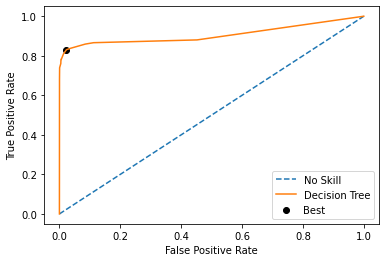

In [47]:
# predict probabilities
y_pred_prob = dtree_grid.predict_proba(X_test)
# keep probabilities for the positive outcome only
y_pred_prob = y_pred_prob[:, 1]

# calculate roc curves
fpr, tpr, thresholds = roc_curve(y_test, y_pred_prob)
# get the best threshold
J = tpr - fpr
ix = argmax(J)
best_thresh = thresholds[ix]
print('Best Threshold=%f' % (best_thresh))

# plot the roc curve for the model
plt.plot([0,1], [0,1], linestyle='--', label='No Skill')
plt.plot(fpr, tpr, label='Decision Tree')
plt.scatter(fpr[ix], tpr[ix], marker='o', color='black', label='Best')
# axis labels
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.legend()
# show the plot
plt.show()

In [48]:
y_class = list(map(lambda x: 1 if x > best_thresh else 0,y_pred_prob))
# create onfusion matrix
cm = confusion_matrix(y_test, y_class)
print(cm)

# check sensitivity and specificity
sensitivity, specificity, _ = sensitivity_specificity_support(y_test, y_class, average='binary')
print("Sensitivity: \t", round(sensitivity, 2), "\n", "Specificity: \t", round(specificity, 2), sep='')
AUC = round(metrics.roc_auc_score(y_test, y_class),4)


model_results = pd.DataFrame([['Decision Tree',round(sensitivity,4), round(specificity,4),round(dtree_grid.best_score_,4), AUC]],
               columns = ['Model','Sensitivity','Specificity','Train AUC Score','Test AUC Score'])
model_results


[[84148  1153]
 [   27   115]]
Sensitivity: 	0.81
Specificity: 	0.99


,Model,Sensitivity,Specificity,Train AUC Score,Test AUC Score
0,Decision Tree,0.8099,0.9865,0.9336,0.8982


## Random Forest

In [49]:
# Random forest
from sklearn.model_selection import RandomizedSearchCV
#Pipeline Processing for powertranformation and Decision Tree classifier
pipe = Pipeline([('rf', RandomForestClassifier(random_state=42, class_weight = 'balanced',
                                                                          warm_start = True))])

# hyperparameter space
params = {"rf__criterion": ['gini', 'entropy'],"rf__n_estimators": [100,110],
         "rf__min_samples_leaf": [8,10]}

# create 5 folds
folds = StratifiedKFold(n_splits = 5, shuffle = True, random_state = 4)

# create Randomsearch object
rf_grid = RandomizedSearchCV(estimator=pipe, cv=folds, param_distributions=params, scoring='roc_auc', n_jobs=-1, verbose=1,
                             random_state=42 )



In [50]:
# Fit the grid search to the data
rf_grid.fit(X_train,y_train)

# We automatically get the logistic regression with the best parameters.
rf_grid.best_estimator_

# print best hyperparameters
print("Best Recall: ", rf_grid.best_score_)
print("Best hyperparameters: ", rf_grid.best_params_)

Fitting 5 folds for each of 8 candidates, totalling 40 fits


[Parallel(n_jobs=-1)]: Using backend LokyBackend with 8 concurrent workers.
[Parallel(n_jobs=-1)]: Done  40 out of  40 | elapsed: 17.1min finished


Best Recall:  0.9668739077618698
Best hyperparameters:  {'rf__n_estimators': 110, 'rf__min_samples_leaf': 10, 'rf__criterion': 'entropy'}


Best Threshold=0.108664


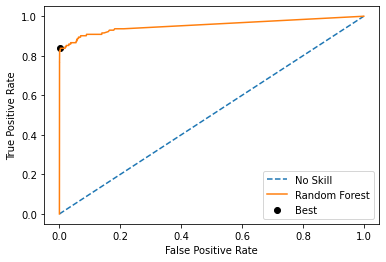

In [51]:
# predict probabilities
y_pred_prob = rf_grid.predict_proba(X_test)
# keep probabilities for the positive outcome only
y_pred_prob = y_pred_prob[:, 1]

# calculate roc curves
fpr, tpr, thresholds = roc_curve(y_test, y_pred_prob)
# get the best threshold
J = tpr - fpr
ix = argmax(J)
best_thresh = thresholds[ix]
print('Best Threshold=%f' % (best_thresh))

# plot the roc curve for the model
plt.plot([0,1], [0,1], linestyle='--', label='No Skill')
plt.plot(fpr, tpr, label='Random Forest')
plt.scatter(fpr[ix], tpr[ix], marker='o', color='black', label='Best')
# axis labels
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.legend()
# show the plot
plt.show()


In [52]:
y_class = list(map(lambda x: 1 if x > best_thresh else 0,y_pred_prob))

In [53]:
# create onfusion matrix
cm = confusion_matrix(y_test, y_class)
print(cm)

[[85032   269]
 [   24   118]]


In [54]:
# check sensitivity and specificity
sensitivity, specificity, _ = sensitivity_specificity_support(y_test, y_class, average='binary')
print("Sensitivity: \t", round(sensitivity, 2), "\n", "Specificity: \t", round(specificity, 2), sep='')
AUC = round(metrics.roc_auc_score(y_test, y_class),4)

Sensitivity: 	0.83
Specificity: 	1.0


In [55]:
model_results = pd.DataFrame([['Random Forest',round(sensitivity,4), round(specificity,4),round(rf_grid.best_score_,4), AUC]],
               columns = ['Model','Sensitivity','Specificity','Train AUC Score','Test AUC Score'])
uni_oversamp = uni_oversamp.append(model_results, ignore_index = True)
uni_oversamp


NameError: name 'uni_oversamp' is not defined

In [56]:
## **XG Boost**

from xgboost import XGBClassifier

#Pipeline Processing for powertranformation and Decision Tree classifier
pipe = Pipeline([ 
                 ('xgb', XGBClassifier(n_estimators=120, 
                                       objective='binary:logistic', warm_start = True, class_weight='balanced'))])

params = {
        "xgb__gamma": [0.06,0.07],
        "xgb__max_depth": [7,8],
        "xgb__learning_rate": [0.1,0.2],
        }
# create 5 folds
folds = StratifiedKFold(n_splits = 5, shuffle = True, random_state = 4)

xgb_random = RandomizedSearchCV(estimator = pipe, param_distributions=params, scoring='roc_auc', n_jobs=-1, cv=folds, verbose=1, 
                                random_state=42 )





In [57]:
# fitting the model
xgb_random.fit(X_train, y_train)

# We automatically get the logistic regression with the best parameters.
xgb_random.best_estimator_

# print best hyperparameters
print("Best Recall: ", xgb_random.best_score_)
print("Best hyperparameters: ", xgb_random.best_params_)

# predict probabilities
y_pred_prob = xgb_random.predict_proba(X_test)
# keep probabilities for the positive outcome only
y_pred_prob = y_pred_prob[:, 1]

Fitting 5 folds for each of 8 candidates, totalling 40 fits


[Parallel(n_jobs=-1)]: Using backend LokyBackend with 8 concurrent workers.
[Parallel(n_jobs=-1)]: Done  40 out of  40 | elapsed: 26.2min finished


[21:54:57] WARNING: /Users/travis/build/dmlc/xgboost/src/learner.cc:516: 
Parameters: { class_weight, warm_start } might not be used.

  This may not be accurate due to some parameters are only used in language bindings but
  passed down to XGBoost core.  Or some parameters are not used but slip through this
  verification. Please open an issue if you find above cases.


Best Recall:  0.9791414960942543
Best hyperparameters:  {'xgb__max_depth': 7, 'xgb__learning_rate': 0.1, 'xgb__gamma': 0.07}


Best Threshold=0.001080


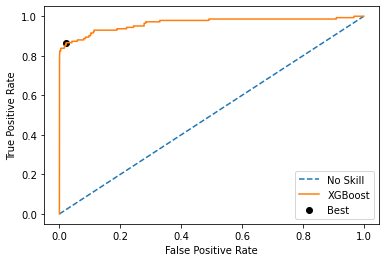

In [58]:
# calculate roc curves
fpr, tpr, thresholds = roc_curve(y_test, y_pred_prob)
# get the best threshold
J = tpr - fpr
ix = argmax(J)
best_thresh = thresholds[ix]
print('Best Threshold=%f' % (best_thresh))

# plot the roc curve for the model
plt.plot([0,1], [0,1], linestyle='--', label='No Skill')
plt.plot(fpr, tpr, label='XGBoost')
plt.scatter(fpr[ix], tpr[ix], marker='o', color='black', label='Best')
# axis labels
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.legend()
# show the plot
plt.show()

In [59]:
y_class = list(map(lambda x: 1 if x > best_thresh else 0,y_pred_prob))

In [60]:
cm = confusion_matrix(y_test, y_class)
print(cm)


[[83428  1873]
 [   20   122]]


In [61]:
# check sensitivity and specificity
sensitivity, specificity, _ = sensitivity_specificity_support(y_test, y_class, average='binary')
print("Sensitivity: \t", round(sensitivity, 2), "\n", "Specificity: \t", round(specificity, 2), sep='')
AUC = round(metrics.roc_auc_score(y_test, y_class),4)


Sensitivity: 	0.86
Specificity: 	0.98


In [62]:
# check sensitivity and specificity
sensitivity, specificity, _ = sensitivity_specificity_support(y_test, y_class, average='binary')
print("Sensitivity: \t", round(sensitivity, 2), "\n", "Specificity: \t", round(specificity, 2), sep='')
AUC = round(metrics.roc_auc_score(y_test, y_class),4)


Sensitivity: 	0.86
Specificity: 	0.98


In [63]:
model_results = pd.DataFrame([['XGBoost',round(sensitivity,4), round(specificity,4),round(xgb_random.best_score_,4), AUC]],
               columns = ['Model','Sensitivity','Specificity','Train AUC Score','Test AUC Score'])
uni_oversamp = uni_oversamp.append(model_results, ignore_index = True)
uni_oversamp

NameError: name 'uni_oversamp' is not defined

## 2. Balancing Techniue 2- Random Oversampling

In [64]:


from imblearn.over_sampling import RandomOverSampler
print('Original dataset shape: ')
print(y_train.value_counts())
print('\n')

ros = RandomOverSampler(random_state=42)
X_ros, y_ros = ros.fit_resample(X_train, y_train)
print('Resampled dataset shape: ')
print(y_ros.value_counts())


print('Resampled dataset shape: ')
#Checking the class (percentage) distribution of the target after Random oversampling
pd.crosstab(y_ros, columns='count')

logistic = LogisticRegression(random_state = 42)

# create pipeline
steps = [
         ("logistic", logistic)
        ]

# compile pipeline
logis = Pipeline(steps)


# Logistic Regression 
params = {"logistic__penalty": ['l1', 'l2'], 'logistic__C': [0.006,0.007], 
          "logistic__solver" : ['sag', 'saga']}

# create 5 folds
folds = StratifiedKFold(n_splits = 5, shuffle = True, random_state = 4)

grid_log_reg = RandomizedSearchCV(estimator=logis, cv=folds, param_distributions=params, scoring='roc_auc', n_jobs=-1, verbose=1,random_state = 42)

grid_log_reg.fit(X_ros, y_ros)

# We automatically get the logistic regression with the best parameters.
grid_log_reg.best_estimator_

# print best hyperparameters
print("Best ROC_AUC: ", grid_log_reg.best_score_)
print("Best hyperparameters: ", grid_log_reg.best_params_)

Original dataset shape: 
0    199014
1       350
Name: Class, dtype: int64


Resampled dataset shape: 
1    199014
0    199014
Name: Class, dtype: int64
Resampled dataset shape: 
Fitting 5 folds for each of 8 candidates, totalling 40 fits


[Parallel(n_jobs=-1)]: Using backend LokyBackend with 8 concurrent workers.
[Parallel(n_jobs=-1)]: Done  40 out of  40 | elapsed:   42.3s finished


Best ROC_AUC:  0.9902449265919779
Best hyperparameters:  {'logistic__solver': 'sag', 'logistic__penalty': 'l2', 'logistic__C': 0.007}


Best Threshold=0.000000


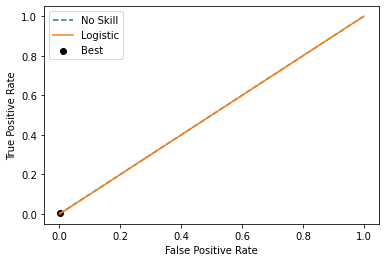

In [65]:
# predict probabilities
y_pred_prob = grid_log_reg.predict_proba(X_test)
# keep probabilities for the positive outcome only
y_pred_prob = y_pred_prob[:, 1]

# calculate roc curves
fpr, tpr, thresholds = roc_curve(y_test, y_pred_prob)
# get the best threshold
J = tpr - fpr
ix = argmax(J)
best_thresh = thresholds[ix]
print('Best Threshold=%f' % (best_thresh))

# plot the roc curve for the model
plt.plot([0,1], [0,1], linestyle='--', label='No Skill')
plt.plot(fpr, tpr, label='Logistic')
plt.scatter(fpr[ix], tpr[ix], marker='o', color='black', label='Best')
# axis labels
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.legend()
# show the plot
plt.show()

y_class = list(map(lambda x: 1 if x > best_thresh else 0,y_pred_prob))

In [66]:
# create onfusion matrix
cm = confusion_matrix(y_test, y_class)
print(cm)
# check sensitivity and specificity
sensitivity, specificity, _ = sensitivity_specificity_support(y_test, y_class, average='binary')
print("Sensitivity: \t", round(sensitivity, 3), "\n", "Specificity: \t", round(specificity, 3), sep='')
AUC = round(metrics.roc_auc_score(y_test, y_class),4)

rand_oversamp = pd.DataFrame([['Logistic Regression',round(sensitivity,4), round(specificity,4),round(grid_log_reg.best_score_,4), AUC]],
               columns = ['Model','Sensitivity','Specificity','Train AUC Score','Test AUC Score'])
rand_oversamp

[[85097   204]
 [  142     0]]
Sensitivity: 	0.0
Specificity: 	0.998


,Model,Sensitivity,Specificity,Train AUC Score,Test AUC Score
0,Logistic Regression,0.0,0.9976,0.9902,0.4988


## Decision Tree

In [67]:
#Pipeline Processing for powertranformation and Decision Tree classifier
pipe = Pipeline([('dtree', DecisionTreeClassifier(random_state = 42))])

# hyperparameter space
params = {"dtree__criterion": ['gini', 'entropy'], "dtree__max_depth": [3,4],"dtree__min_samples_split": [15,20],
          "dtree__min_samples_leaf": [3000,3500]}



# create 5 folds
folds = StratifiedKFold(n_splits = 5, shuffle = True, random_state = 4)

# create gridsearch object
dtree_grid = RandomizedSearchCV(estimator=pipe, cv=folds, param_distributions=params, scoring='roc_auc', n_jobs=-1, verbose=1,random_state = 42)

# Fit the grid search to the data
dtree_grid.fit(X_ros, y_ros)

# We automatically get the logistic regression with the best parameters.
dtree_grid.best_estimator_


Fitting 5 folds for each of 10 candidates, totalling 50 fits


[Parallel(n_jobs=-1)]: Using backend LokyBackend with 8 concurrent workers.
[Parallel(n_jobs=-1)]: Done  34 tasks      | elapsed:   32.5s
[Parallel(n_jobs=-1)]: Done  50 out of  50 | elapsed:   42.7s finished


Pipeline(steps=[('dtree',
                 DecisionTreeClassifier(criterion='entropy', max_depth=4,
                                        min_samples_leaf=3000,
                                        min_samples_split=20,
                                        random_state=42))])

In [68]:
# print best hyperparameters
print("Best ROC_AUC: ", dtree_grid.best_score_)
print("Best hyperparameters: ", dtree_grid.best_params_)

# predict probabilities
y_pred_prob = dtree_grid.predict_proba(X_test)
# keep probabilities for the positive outcome only
y_pred_prob = y_pred_prob[:, 1]

# calculate roc curves
fpr, tpr, thresholds = roc_curve(y_test, y_pred_prob)
# get the best threshold
J = tpr - fpr
ix = argmax(J)
best_thresh = thresholds[ix]
print('Best Threshold=%f' % (best_thresh))


Best ROC_AUC:  0.986631117604999
Best hyperparameters:  {'dtree__min_samples_split': 20, 'dtree__min_samples_leaf': 3000, 'dtree__max_depth': 4, 'dtree__criterion': 'entropy'}
Best Threshold=0.873055


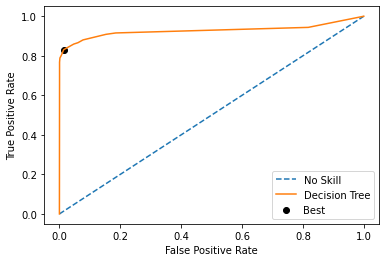

In [69]:
# plot the roc curve for the model
plt.plot([0,1], [0,1], linestyle='--', label='No Skill')
plt.plot(fpr, tpr, label='Decision Tree')
plt.scatter(fpr[ix], tpr[ix], marker='o', color='black', label='Best')
# axis labels
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.legend()
# show the plot
plt.show()

In [70]:
y_class = list(map(lambda x: 1 if x > best_thresh else 0,y_pred_prob))

# create onfusion matrix
cm = confusion_matrix(y_test, y_class)
print(cm)

# check sensitivity and specificity
sensitivity, specificity, _ = sensitivity_specificity_support(y_test, y_class, average='binary')
print("Sensitivity: \t", round(sensitivity, 2), "\n", "Specificity: \t", round(specificity, 2), sep='')
AUC = round(metrics.roc_auc_score(y_test, y_class),4)

[[84748   553]
 [   28   114]]
Sensitivity: 	0.8
Specificity: 	0.99


In [71]:
model_results = pd.DataFrame([['Decision Tree',round(sensitivity,4), round(specificity,4),round( dtree_grid.best_score_,4), AUC]],
               columns = ['Model','Sensitivity','Specificity','Train AUC Score', 'Test AUC Score'])

rand_oversamp = rand_oversamp.append(model_results, ignore_index = True)
rand_oversamp

,Model,Sensitivity,Specificity,Train AUC Score,Test AUC Score
0,Logistic Regression,0.0000,0.9976,0.9902,0.4988
1,Decision Tree,0.8028,0.9935,0.9866,0.8982


## Random Forest

In [72]:
#Pipeline Processing for powertranformation and Decision Tree classifier
pipe = Pipeline([('rf', RandomForestClassifier(random_state=42,
                                                                          warm_start = True))])

# hyperparameter space
params = {"rf__criterion": ['gini', 'entropy'],"rf__n_estimators": [20,30],
         "rf__min_samples_leaf": [500,550]}

# create 5 folds
folds = StratifiedKFold(n_splits = 3, shuffle = True, random_state = 4)

# create gridsearch object
rf_grid = RandomizedSearchCV(estimator=pipe, cv=folds, param_distributions=params, scoring='roc_auc', n_jobs=-1, verbose=1,
                             random_state=42 )



In [73]:
# Fit the grid search to the data
rf_grid.fit(X_ros, y_ros)

# We automatically get the logistic regression with the best parameters.
rf_grid.best_estimator_

# print best hyperparameters
print("Best ROC_AUC: ", rf_grid.best_score_)
print("Best hyperparameters: ", rf_grid.best_params_)

# predict probabilities
y_pred_prob = rf_grid.predict_proba(X_test)
# keep probabilities for the positive outcome only
y_pred_prob = y_pred_prob[:, 1]

Fitting 3 folds for each of 8 candidates, totalling 24 fits


[Parallel(n_jobs=-1)]: Using backend LokyBackend with 8 concurrent workers.
[Parallel(n_jobs=-1)]: Done  24 out of  24 | elapsed:  2.2min finished


Best ROC_AUC:  0.9998885444446403
Best hyperparameters:  {'rf__n_estimators': 30, 'rf__min_samples_leaf': 500, 'rf__criterion': 'entropy'}


In [74]:
# calculate roc curves
fpr, tpr, thresholds = roc_curve(y_test, y_pred_prob)
# get the best threshold
J = tpr - fpr
ix = argmax(J)
best_thresh = thresholds[ix]
print('Best Threshold=%f' % (best_thresh))

Best Threshold=0.131470


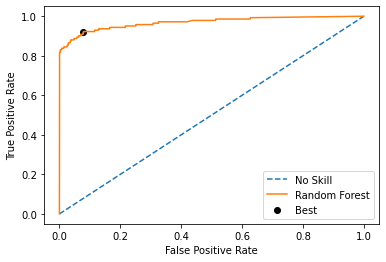

In [75]:
# plot the roc curve for the model
plt.plot([0,1], [0,1], linestyle='--', label='No Skill')
plt.plot(fpr, tpr, label='Random Forest')
plt.scatter(fpr[ix], tpr[ix], marker='o', color='black', label='Best')
# axis labels
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.legend()
# show the plot
plt.show()

y_class = list(map(lambda x: 1 if x > best_thresh else 0,y_pred_prob))

In [76]:
# create onfusion matrix
cm = confusion_matrix(y_test, y_class)
print(cm)

# check sensitivity and specificity
sensitivity, specificity, _ = sensitivity_specificity_support(y_test, y_class, average='binary')
print("Sensitivity: \t", round(sensitivity, 2), "\n", "Specificity: \t", round(specificity, 2), sep='')
AUC = round(metrics.roc_auc_score(y_test, y_class),4)


model_results = pd.DataFrame([['Random Forest',round(sensitivity,4),round(specificity,4),round(rf_grid.best_score_,4), AUC]],
               columns = ['Model','Sensitivity','Specificity','Train AUC Score','Test AUC Score'])
rand_oversamp = rand_oversamp.append(model_results, ignore_index = True)
rand_oversamp

[[78577  6724]
 [   12   130]]
Sensitivity: 	0.92
Specificity: 	0.92


,Model,Sensitivity,Specificity,Train AUC Score,Test AUC Score
0,Logistic Regression,0.0000,0.9976,0.9902,0.4988
1,Decision Tree,0.8028,0.9935,0.9866,0.8982
2,Random Forest,0.9155,0.9212,0.9999,0.9183


## XG Boost

In [77]:
#Pipeline Processing for powertranformation and Decision Tree classifier
pipe = Pipeline([ 
                 ('xgb', XGBClassifier(n_estimators=120, 
                                       objective='binary:logistic', warm_start = True))])


params = {
        "xgb__gamma": [0.07,0.08],
        "xgb__max_depth": [8,9],
        "xgb__learning_rate": [0.2,0.3],
        }
# create 5 folds
folds = StratifiedKFold(n_splits = 5, shuffle = True, random_state = 4)

xgb_random = RandomizedSearchCV(estimator = pipe, param_distributions=params, scoring='roc_auc', n_jobs=-1, cv=folds, verbose=1, random_state=42 )

# Fitting the model

xgb_random.fit(X_ros, y_ros)

# We automatically get the logistic regression with the best parameters.
xgb_random.best_estimator_


Fitting 5 folds for each of 8 candidates, totalling 40 fits


[Parallel(n_jobs=-1)]: Using backend LokyBackend with 8 concurrent workers.
[Parallel(n_jobs=-1)]: Done  40 out of  40 | elapsed: 56.4min finished


[23:06:13] WARNING: /Users/travis/build/dmlc/xgboost/src/learner.cc:516: 
Parameters: { warm_start } might not be used.

  This may not be accurate due to some parameters are only used in language bindings but
  passed down to XGBoost core.  Or some parameters are not used but slip through this
  verification. Please open an issue if you find above cases.




Pipeline(steps=[('xgb',
                 XGBClassifier(base_score=0.5, booster='gbtree',
                               colsample_bylevel=1, colsample_bynode=1,
                               colsample_bytree=1, gamma=0.08, gpu_id=-1,
                               importance_type='gain',
                               interaction_constraints='', learning_rate=0.3,
                               max_delta_step=0, max_depth=8,
                               min_child_weight=1, missing=nan,
                               monotone_constraints='()', n_estimators=120,
                               n_jobs=0, num_parallel_tree=1, random_state=0,
                               reg_alpha=0, reg_lambda=1, scale_pos_weight=1,
                               subsample=1, tree_method='exact',
                               validate_parameters=1, verbosity=None,
                               warm_start=True))])

In [78]:
# print best hyperparameters
print("Best ROC_AUC: ", xgb_random.best_score_)
print("Best hyperparameters: ", xgb_random.best_params_)

# predict probabilities
y_pred_prob = xgb_random.predict_proba(X_test)
# keep probabilities for the positive outcome only
y_pred_prob = y_pred_prob[:, 1]

Best ROC_AUC:  0.999990071093206
Best hyperparameters:  {'xgb__max_depth': 8, 'xgb__learning_rate': 0.3, 'xgb__gamma': 0.08}


In [79]:
# calculate roc curves
fpr, tpr, thresholds = roc_curve(y_test, y_pred_prob)
# get the best threshold
J = tpr - fpr
ix = argmax(J)
best_thresh = thresholds[ix]
print('Best Threshold=%f' % (best_thresh))

Best Threshold=0.000046


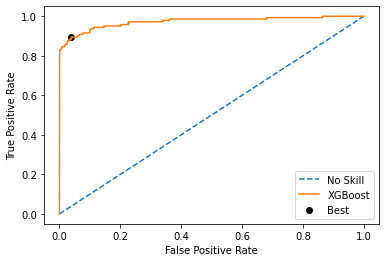

In [80]:
# plot the roc curve for the model
plt.plot([0,1], [0,1], linestyle='--', label='No Skill')
plt.plot(fpr, tpr, label='XGBoost')
plt.scatter(fpr[ix], tpr[ix], marker='o', color='black', label='Best')
# axis labels
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.legend()
# show the plot
plt.show()

In [81]:
y_class = list(map(lambda x: 1 if x > best_thresh else 0,y_pred_prob))

# create onfusion matrix
cm = confusion_matrix(y_test, y_class)
print(cm)

# check sensitivity and specificity
sensitivity, specificity, _ = sensitivity_specificity_support(y_test, y_class, average='binary')
print("Sensitivity: \t", round(sensitivity, 2), "\n", "Specificity: \t", round(specificity, 2), sep='')
AUC = round(metrics.roc_auc_score(y_test, y_class),4)

[[81954  3347]
 [   16   126]]
Sensitivity: 	0.89
Specificity: 	0.96


In [82]:
model_results = pd.DataFrame([['XGBoost',round(sensitivity,4), round(specificity,4),round(xgb_random.best_score_,4), AUC]],
               columns = ['Model','Sensitivity','Specificity','Train AUC Score', 'Test AUC Score'])
rand_oversamp = rand_oversamp.append(model_results, ignore_index = True)
rand_oversamp


,Model,Sensitivity,Specificity,Train AUC Score,Test AUC Score
0,Logistic Regression,0.0000,0.9976,0.9902,0.4988
1,Decision Tree,0.8028,0.9935,0.9866,0.8982
2,Random Forest,0.9155,0.9212,0.9999,0.9183
3,XGBoost,0.8873,0.9608,1.0000,0.9240


In [84]:
## Balancing Technique 3- ADASYN
from imblearn import over_sampling
from imblearn.over_sampling import SMOTE, ADASYN

#Applying Adasyn
ada = over_sampling.ADASYN(random_state=0)
X_train_adasyn, y_train_adasyn = ada.fit_resample(X_train, y_train)

print("Imbalance in Original y_train : ")
pd.crosstab( y_train, columns='count')

print("y_train after ADASYN : ")
#Checking the class (percentage) distribution of the target after ADASYN
pd.crosstab( y_train_adasyn, columns='count')

Imbalance in Original y_train : 
y_train after ADASYN : 


col_0,count
Class,
0,199014
1,199048


In [85]:
import warnings
warnings.filterwarnings("ignore")



ada = over_sampling.ADASYN(random_state=0)
X_train_adasyn, y_train_adasyn = ada.fit_resample(X_train, y_train)
# Artificial minority samples and corresponding minority labels from ADASYN are appended
# below X_train and y_train respectively
# So to exclusively get the artificial minority samples from ADASYN, we do
X_train_adasyn_1 = X_train_adasyn[X_train.shape[0]:]

X_train_1 = X_train.to_numpy()[np.where(y_train==1.0)]
X_train_0 = X_train.to_numpy()[np.where(y_train==0.0)]


TypeError: '(slice(None, 350, None), 0)' is an invalid key

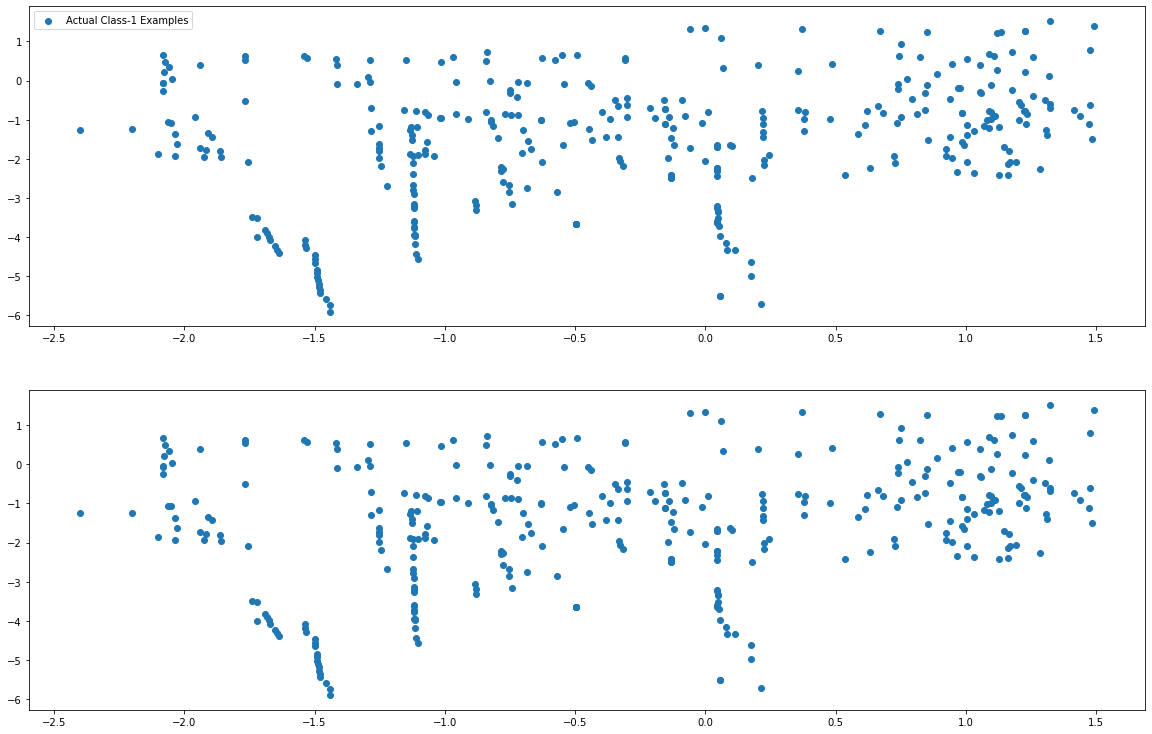

In [86]:
import matplotlib.pyplot as plt
%matplotlib inline
plt.rcParams['figure.figsize'] = [20, 20]
fig = plt.figure()

plt.subplot(3, 1, 1)
plt.scatter(X_train_1[:, 0], X_train_1[:, 1], label='Actual Class-1 Examples')
plt.legend()

plt.subplot(3, 1, 2)
plt.scatter(X_train_1[:, 0], X_train_1[:, 1], label='Actual Class-1 Examples')
plt.scatter(X_train_adasyn_1[:X_train_1.shape[0], 0], X_train_adasyn_1[:X_train_1.shape[0], 1],
            label='Artificial ADASYN Class-1 Examples')
plt.legend()

plt.subplot(3, 1, 3)
plt.scatter(X_train_1[:, 0], X_train_1[:, 1], label='Actual Class-1 Examples')
plt.scatter(X_train_0[:X_train_1.shape[0], 0], X_train_0[:X_train_1.shape[0], 1], label='Actual Class-0 Examples')
plt.legend()

TypeError: '(slice(None, 350, None), 0)' is an invalid key

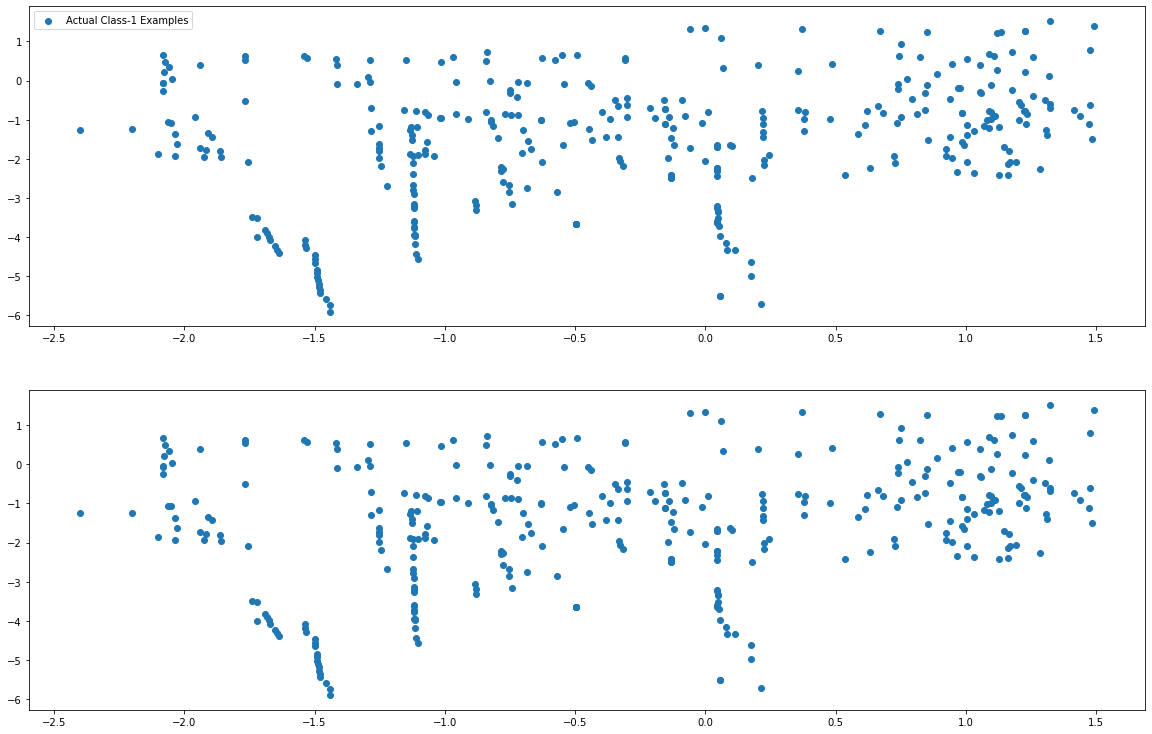

In [87]:
import warnings
warnings.filterwarnings("ignore")
from imblearn import over_sampling

sm = over_sampling.SMOTE(random_state=0)
X_train_smote, y_train_smote = sm.fit_resample(X_train, y_train)
# Artificial minority samples and corresponding minority labels from SMOTE are appended
# below X_train and y_train respectively
# So to exclusively get the artificial minority samples from SMOTE, we do
X_train_smote_1 = X_train_smote[X_train.shape[0]:]

X_train_1 = X_train.to_numpy()[np.where(y_train==1.0)]
X_train_0 = X_train.to_numpy()[np.where(y_train==0.0)]


plt.rcParams['figure.figsize'] = [20, 20]
fig = plt.figure()

plt.subplot(3, 1, 1)
plt.scatter(X_train_1[:, 0], X_train_1[:, 1], label='Actual Class-1 Examples')
plt.legend()

plt.subplot(3, 1, 2)
plt.scatter(X_train_1[:, 0], X_train_1[:, 1], label='Actual Class-1 Examples')
plt.scatter(X_train_smote_1[:X_train_1.shape[0], 0], X_train_smote_1[:X_train_1.shape[0], 1],
            label='Artificial SMOTE Class-1 Examples')
plt.legend()

plt.subplot(3, 1, 3)
plt.scatter(X_train_1[:, 0], X_train_1[:, 1], label='Actual Class-1 Examples')
plt.scatter(X_train_0[:X_train_1.shape[0], 0], X_train_0[:X_train_1.shape[0], 1], label='Actual Class-0 Examples')
plt.legend()

In [88]:
import warnings
warnings.filterwarnings("ignore")

from imblearn import over_sampling

ada = over_sampling.ADASYN(random_state=0)
X_train_adasyn, y_train_adasyn = ada.fit_resample(X_train, y_train)
# Artificial minority samples and corresponding minority labels from ADASYN are appended
# below X_train and y_train respectively
# So to exclusively get the artificial minority samples from ADASYN, we do
X_train_adasyn_1 = X_train_adasyn[X_train.shape[0]:]

X_train_1 = X_train.to_numpy()[np.where(y_train==1.0)]
X_train_0 = X_train.to_numpy()[np.where(y_train==0.0)]


In [ ]:
import matplotlib.pyplot as plt
%matplotlib inline
plt.rcParams['figure.figsize'] = [20, 20]
fig = plt.figure()

plt.subplot(3, 1, 1)
plt.scatter(X_train_1[:, 0], X_train_1[:, 1], label='Actual Class-1 Examples')
plt.legend()

plt.subplot(3, 1, 2)
plt.scatter(X_train_1[:, 0], X_train_1[:, 1], label='Actual Class-1 Examples')
plt.scatter(X_train_adasyn_1[:X_train_1.shape[0], 0], X_train_adasyn_1[:X_train_1.shape[0], 1],
            label='Artificial ADASYN Class-1 Examples')
plt.legend()

plt.subplot(3, 1, 3)
plt.scatter(X_train_1[:, 0], X_train_1[:, 1], label='Actual Class-1 Examples')
plt.scatter(X_train_0[:X_train_1.shape[0], 0], X_train_0[:X_train_1.shape[0], 1], label='Actual Class-0 Examples')
plt.legend()
